In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container {width: 99% !important;}</style>"))

In [2]:
import pyspark

In [3]:
sc = pyspark.SparkContext()

23/10/01 09:32:33 WARN Utils: Your hostname, Alashmony-Lenovo-Z51-70 resolves to a loopback address: 127.0.1.1; using 192.168.1.182 instead (on interface wlp3s0)
23/10/01 09:32:33 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/01 09:32:35 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession(sc)

In [5]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
spark

# Where to Begin

## Where to Begin
1. Where to Begin

Hi, I'm John Hogue and welcome to Feature Engineering with PySpark. Easily one of the most important aspects of applied machine learning is feature engineering. It is the process of using domain knowledge to create new features to help our models perform better. In this course, we will look at a real data set and work our way to building a Regression Model in PySpark.

2. Diving Straight to Analysis

Before we dive in its important to note that while the techniques you'll learn in this course are invaluable, that data science cannot be applied as a cookie cutter. You will need to research your data and become your own expert. There is much to be said of the dangers of not understanding your data, especially where our outputs are increasingly being used to make decisions and inform policies. Before you dive into modeling, spend time to define what your goals are and how the output might be used. Take the time to research your data and its limitations. Often times you may be tasked with explaining what is and isn't possible. Lastly, remember that data science is all about being curious, asking questions and applying new ways to solve problems!

3. The Data Science Process

Every project and data set is different. Data Science is an iterative process that requires comfort with uncertainty as at any point you may have to go backward or even start over. A good project may inspire further questions that set the goals for the next project! As we progress through this process, this course will have extra emphasis on a lot of the 'art' sides of data science, exploring data, cleaning it and engineering it for use in a model.

4. Spark changes fast and frequently

Before we get started, as a cutting-edge technology, Spark changes fast and frequently. Make sure you are looking at the right version! You can always go to the latest URL by using slash latest or put the version number, major, minor and patch to get a specific version. Programmatically you can check your version of Spark with these commands. That way you can ensure you are looking at the right documentation and not using deprecated methods!

5. Data Formats: Parquet

For this course, we will be using a Parquet file. Like most data in Hadoop, the platform that Spark runs on, it is a write once, read many times format. Parquet data is columnar, meaning that it is organized by columns, an important feature for huge data sets as it is blazingly fast to read in ONLY the data you need. CSVs, on the other hand, have to read and parse the whole data set to read a single field. Another difference is Parquet fields are defined and typed, saving users from defining data types, like dates, booleans, or strings. For this reason, parquet is relatively slow to write. Since it's not delimited by characters it's less likely to be read in wrong if those characters exist in the data. These are just a few advantages that are causing the industry to adopt Parquet quickly.

6. Getting the Data to Spark

We have many format readers to choose from for converting various file types to a PySpark DataFrame. Here we will use spark read parquet and put the results into the variable df representing a dataframe.

7. Let's Practice!

In this video, we covered off on some important considerations when starting any data science project. We also learned about parquet and how to load it to a spark dataframe. In the exercises, you'll verify the versioning of PySpark and Python and finally, you'll load the data yourself!

### Check Version
Checking the version of which Spark and Python installed is important as it changes very quickly and drastically. Reading the wrong documentation can cause lots of lost time and unnecessary frustration!

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [PySpark Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/65076e3c-9df1-40d5-a0c2-36294d9a3ca9) and keep it handy!

### Instructions
- Print the Spark `version`.
- Print the Python `version_info`.

In [7]:
# Return spark version
print(spark.version)

# Return python version
import sys
print(sys.version_info)

3.4.0
sys.version_info(major=3, minor=10, micro=13, releaselevel='final', serial=0)


### Load in the data
Reading in data is the first step to using PySpark for data science! Let's leverage the new industry standard of parquet files!

**Instructions**

- Use the `parquet()` file reader to read in `'Real_Estate.parq'` as described in the video exercise.
- Print out the list of columns with `columns`.

In [8]:
import pandas as pd

In [9]:
#Prepare the parquest from the csv
df = spark.read.csv("2017_StPaul_MN_Real_Estate.csv",header=True, inferSchema=True)

df.columns

['No.',
 'MLSID',
 'StreetNumberNumeric',
 'streetaddress',
 'STREETNAME',
 'PostalCode',
 'StateOrProvince',
 'City',
 'SalesClosePrice',
 'LISTDATE',
 'LISTPRICE',
 'LISTTYPE',
 'OriginalListPrice',
 'PricePerTSFT',
 'FOUNDATIONSIZE',
 'FENCE',
 'MapLetter',
 'LotSizeDimensions',
 'SchoolDistrictNumber',
 'DAYSONMARKET',
 'offmarketdate',
 'Fireplaces',
 'RoomArea4',
 'roomtype',
 'ROOF',
 'RoomFloor4',
 'PotentialShortSale',
 'PoolDescription',
 'PDOM',
 'GarageDescription',
 'SQFTABOVEGROUND',
 'Taxes',
 'RoomFloor1',
 'RoomArea1',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LivingArea',
 'UNITNUMBER',
 'YEARBUILT',
 'ZONING',
 'STYLE',
 'ACRES',
 'CoolingDescription',
 'APPLIANCES',
 'backonmarketdate',
 'ROOMFAMILYCHAR',
 'RoomArea3',
 'EXTERIOR',
 'RoomFloor3',
 'RoomFloor2',
 'RoomArea2',
 'DiningRoomDescription',
 'BASEMENT',
 'BathsFull',
 'BathsHalf',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'Class',
 'BATHSTOTAL',
 'BATHDESC',
 'RoomArea5',
 'RoomFloor5',
 'RoomArea6',
 'RoomFloor6'

In [10]:
#df.write.parquet("Real_Estate.parq")
df.toPandas().to_parquet("Real_Estate.parq")

23/10/01 09:33:52 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [11]:
# Read the file into a dataframe
#print(os.listdir())
#print(os.getcwd())
#df = spark.read.parquet('/tmp/tmpfkser8re/Real_Estate.parq')

df = spark.read.parquet('Real_Estate.parq')
# Print columns in dataframe
print(df.columns)

['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale', 'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND', 'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES', 'backonmarketdate', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7', 'RoomArea8', 'RoomFloor8', 'Bedroo

## Defining A Problem
1. Defining A Problem

What's the point of doing an analysis if you aren't solving the right problem? In this video, we will define our problem and the context of our data.

2. What’s Your Problem?

We are going to build a model to predict how much a house sells for. This question can be interpreted multiple ways which is why it's important to take the time formally define it. Let's assume we are real-estate tycoon's looking for the next best investment opportunity. For a given house on the market, with a listed price and series of attributes describing the home, what is it likely to actually sell for, aka the SALESCLOSEPRICE?

3. Context & Limitations of our Real Estate

The dataset we have is a sample of homes that sold over the course of 2017. Using this sample we are to provide a quick proof of concept of whether it's worth investing in more data for the 5.5 million homes that sold in the US in 2017. To do this we need to understand some of the limitations of the data we have. First, we only have a small geographical area, so to apply our model to new areas, poses serious risk! We know that we only have residential data, so we shouldn't expect to predict how much a business location is worth! Lastly, we only have one year's worth of data which will make it hard to draw strong conclusions about seasonality in this dataset.

4. What types of attributes are available?

The original dataset has hundreds of attributes available but in order to start simple we've already worked with our client to identify around 50 attributes they think are likely to influence the price of a home. These attributes generally fall into these groups. For Dates we have date listed, and the year the home was built. For locational data, we have the city that the home is in, its school district and its actual postal address. We also have many different metrics to gauge the size of the home like number of bed and bathrooms as well as the area of living space. For prices, we have the listing price and we wouldn't be able to predict anything without the sale price! We also have a lot of data available on amenities that a house has like a pool or a garage as well as the construction materials used to build the house.

5. Validating Your Data Load

Big data means a lot can go wrong when loading data make sure you have the right number of records and columns! We can use df count to get the row count, df columns to get the list of columns and we can take the length of df columns to get the number of columns!

6. Checking Datatypes

When we used Parquet, it set the data types for all of our fields which is a huge advantage over CSV. It's still worth checking especially if you weren't the one defining them! Here we can use dtypes on our dataframe to create a list of tuples containing a column name and its corresponding datatype.

7. Let's Practice

In this video, we learned about the data set we will be using and the problem we will be trying to solve. Additionally, we learned how to check to see if our data loaded properly by checking rows, columns, and datatypes! Now it's your turn to apply what you've learned in the exercises to verify that our data got loaded correctly!

### What are we predicting?
Which of these fields (or columns) is the value we are trying to predict for?

- `TAXES`
- `SALESCLOSEPRICE`
- `DAYSONMARKET`
- `LISTPRICE`

**Instructions**

- From the listed columns above, identify which one we will use as our dependent variable `$Y$`.
- Using the loaded data set `df`, filter it down to our dependent variable with `select()`. Store this dataframe in the variable `Y_df`.
- Display summary statistics for the dependent variable using `describe()` on `Y_df` and calling `show()` to display it.

In [12]:
# Select our dependent variable
Y_df = df.select(['SALESCLOSEPRICE'])

# Display summary statistics
Y_df.describe().show()

+-------+------------------+
|summary|   SALESCLOSEPRICE|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



### Verifying Data Load
Let's suppose each month you get a new file. You know to expect a certain number of records and columns. In this exercise we will create a function that will validate the file loaded.

**Instructions**

- Create a data validation function `check_load()` with parameters `df` a dataframe, `num_records` as the number of records and `num_columns` the number of columns.
- Using `num_records` create a check to see if the input dataframe df has the same amount with `count()`.
- Compare input number of columns the input dataframe has `withnum_columns` by using `len()` on columns.
- If both of these return True, then print Validation Passed

In [13]:
def check_load(df, num_records, num_columns):
    # Takes a dataframe and compares record and column counts to input
    # Message to return if the critera below aren't met
    message = 'Validation Failed'
    # Check number of records
    if num_records == df.count():
    # Check number of columns
        if num_columns == len(df.columns):
        # Success message
            message = 'Validation Passed'
    return message

# Print the data validation message
print(check_load(df, 5000, 74))

Validation Passed


### Verifying DataTypes
In the age of data we have access to more attributes than we ever had before. To handle all of them we will build a lot of automation but at a minimum requires that their datatypes be correct. In this exercise we will validate a dictionary of attributes and their datatypes to see if they are correct. This dictionary is stored in the variable `validation_dict` and is available in your workspace.

**Instructions**

- Using `df` create a list of attribute and datatype tuples with dtypes called `actual_dtypes_list`.
- Iterate through `actual_dtypes_list`, checking if the column names exist in the dictionary of expected dtypes `validation_dict`.
- For the keys that exist in the dictionary, check their dtypes and print those that match.

In [14]:
validation_dict = {'AssumableMortgage': 'string', 'SQFTBELOWGROUND': 'bigint', 'AssociationFee': 'bigint', 'AssessedValuation': 'double', 'ASSESSMENTPENDING': 'string'}

In [15]:
df.dtypes

[('No.', 'int'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'int'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'int'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'int'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'int'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'int'),
 ('PricePerTSFT', 'double'),
 ('FOUNDATIONSIZE', 'int'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'int'),
 ('offmarketdate', 'string'),
 ('Fireplaces', 'int'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PoolDescription', 'string'),
 ('PDOM', 'int'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'int'),
 ('Taxes', 'int'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'int'),
 ('LivingArea', 'int'),
 ('UNI

In [16]:
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes
#print(actual_dtypes_list)

# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
  
    # Check if column name is dictionary of expected dtypes
    col_name = attribute_tuple[0]
    if col_name in validation_dict.keys():

        # Compare attribute types
        col_type = attribute_tuple[1]
        if col_type == validation_dict[col_name]:
            print(col_name + ' has expected dtype.')

AssumableMortgage has expected dtype.
ASSESSMENTPENDING has expected dtype.
AssessedValuation has expected dtype.


#### Should be
- **SQFTBELOWGROUND has expected dtype.**
- AssumableMortgage has expected dtype.
- **AssociationFee has expected dtype.**
- ASSESSMENTPENDING has expected dtype.
- AssessedValuation has expected dtype.

In [17]:
print(actual_dtypes_list)

[('No.', 'int'), ('MLSID', 'string'), ('StreetNumberNumeric', 'int'), ('streetaddress', 'string'), ('STREETNAME', 'string'), ('PostalCode', 'int'), ('StateOrProvince', 'string'), ('City', 'string'), ('SalesClosePrice', 'int'), ('LISTDATE', 'string'), ('LISTPRICE', 'int'), ('LISTTYPE', 'string'), ('OriginalListPrice', 'int'), ('PricePerTSFT', 'double'), ('FOUNDATIONSIZE', 'int'), ('FENCE', 'string'), ('MapLetter', 'string'), ('LotSizeDimensions', 'string'), ('SchoolDistrictNumber', 'string'), ('DAYSONMARKET', 'int'), ('offmarketdate', 'string'), ('Fireplaces', 'int'), ('RoomArea4', 'string'), ('roomtype', 'string'), ('ROOF', 'string'), ('RoomFloor4', 'string'), ('PotentialShortSale', 'string'), ('PoolDescription', 'string'), ('PDOM', 'int'), ('GarageDescription', 'string'), ('SQFTABOVEGROUND', 'int'), ('Taxes', 'int'), ('RoomFloor1', 'string'), ('RoomArea1', 'string'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'int'), ('LivingArea', 'int'), ('UNITNUMBER', 'string'), ('YEARBUILT', 'i

## Visually Inspecting Data / EDA
1. Visually Inspecting Data

Data comes in all shapes and sizes. In the field, you will be tasked with using less than perfect data. This means you will need to understand its strengths, weaknesses, and limitations to leverage it effectively.

2. Getting Descriptive with DataFrame.describe()

To get started with understanding your data take a peek at each column to see what they contain. The describe function provides some bare bones basics of Count, Mean, Std Dev, Min and Max. You can run it on the whole dataframe, a single column or a list of columns. Remember to add show to the end if you wish to immediately display results.

3. Many descriptive functions are already available

To further help us understand our data, Pyspark has many built-in descriptive functions available.

4. Example with mean()

The Mean function is considered an aggregate function and as such needs to be passed to the agg method along with the column to run it on as a dictionary. Spark uses lazy evaluation, meaning that it waits to execute code until a specific type of command, called an action forces it to. To force it to return the results immediately, use the collect function.

5. Example with cov()

Covariance is a function that let's us see how two variables vary together. This function is applied to a dataframe and takes two numeric columns and returns a value.

6. seaborn: statistical data visualization

An excellent way to explore your data is through statistical plotting. Seaborn is a Python data visualization library designed specifically for this. We will look at a few plotting examples but there are many, many more for you to follow up on.

7. Notes on plotting

We can plot data using non-Spark libraries like Seaborn but they require converting your pySpark DataFrame to a Pandas DataFrame. Be aware that converting large datasets can cause Pandas to crash. This is because PySpark is made for massive datasets, where pandas is not. The Sample function can help us get a smaller dataset to plot. Here, we will keep sampling with replacement off, take 50% of the data and set a random seed for reproducibility. Using count shows us that the number of records has changed.

8. Prepping for plotting a distribution

We will leverage Seaborn's distplot which will show us the distribution of our dependent variable 'SalesClosePrice'. Please note there are many optional parameters which aren't covered here. Here we import seaborn, then filter the Spark DataFrame down to the SalesClosePrice column and sample it. Then we convert it into a pandas dataframe so we can use it with Seaborn. Lastly, call the distplot function with pandas underscore df to plot.

9. Distribution plot of sales closing price

After plotting we can we can see that most of the data is pushed to the left, something that may need to be remedied depending on the model type we choose. We will cover one option, log scaling, in 'Adjusting Data' later in this course.

10. Relationship plotting

Another great plot to use is lmplot. lm is short for linear model and allows us to quickly see if there is a linear relationship between two variables. For this example, we will look at how 'SalesClosePrice' changes depending on 'SQFTABOVEGROUND'. To do this we will import seaborn, filter our dataset to the two columns, sample it and then convert it to a pandas DataFrame. Lastly, use the sns lmplot function with our x and y columns and dataframe.

11. Linear model plot between SQFT above ground and sales price

Here we can see there is what looks to be a strong relationship between the size of a home and the price it sells for. Therefore we might make the assumption that SQFTABOVEGROUND is a good variable to consider in predicting house prices!

12. Let's practice!

In this video, we explored our data with numerical summaries and visualizations. Now it's your turn to try them out!

## Using Corr()
The old adage 'Correlation does not imply Causation' is a cautionary tale. However, correlation does give us a good nudge to know where to start looking promising features to use in our models. Use this exercise to get a feel for searching through your data for the first time, trying to find patterns.

A list called `columns` containing column names has been created for you. In this exercise you will compute the correlation between those `columns` and `'SALESCLOSEPRICE'`, and find the maximum.

**Instructions**

- Use a `for` loop iterate through the `columns`.
- In each loop cycle, compute the correlation between the current column and `'SALESCLOSEPRICE'` using the `corr()` method.
- Create logic to update the maximum observed correlation and with which column.
- Print out the name of the column that has the maximum correlation with `'SALESCLOSEPRICE'`.

In [18]:
columns = ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES', 'PDOM', 'SQFTABOVEGROUND', 'TAXES', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LIVINGAREA', 'YEARBUILT', 'ACRES', 'BACKONMARKETDATE', 'BATHSFULL', 'BATHSHALF', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'BEDROOMS', 'SQFTBELOWGROUND', 'ASSOCIATIONFEE', 'ASSESSEDVALUATION']


In [19]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = columns[0]

# Loop to check all columns contained in list
for col in columns:
    # Check the correlation of a pair of columns
    corr_val = df.corr(col, 'SALESCLOSEPRICE')
    # Logic to compare corr_max with current corr_val
    if corr_val > corr_max:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col)

LIVINGAREA


### Using Visualizations: distplot
Understanding the distribution of our dependent variable is very important and can impact the type of model or preprocessing we do. A great way to do this is to plot it, however plotting is not a built in function in PySpark, we will need to take some intermediary steps to make sure it works correctly. In this exercise you will visualize the variable the `'LISTPRICE'` variable, and you will gain more insights on its distribution by computing the skewness.

The `matplotlib.pyplot` and `seaborn` packages have been imported for you with aliases `plt` and `sns`.

**Instructions**

- Sample 50% of the dataframe `df` with `sample()` making sure to not use replacement and setting the random seed to 42.
- Convert the Spark `DataFrame` to a `pandas.DataFrame()` with `toPandas()`.
- Plot a distribution plot using seaborn's `distplot()` method.
- Import the `skewness()` function from `pyspark.sql.functions` and compute it on the aggregate of the `'LISTPRICE'` column with the `agg()` method. Remember to `collect()` your result to evaluate the computation. 

In [20]:
#!pip3 install matplotlib seaborn

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

/tmp/ipykernel_8215/4078765244.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pandas_df)


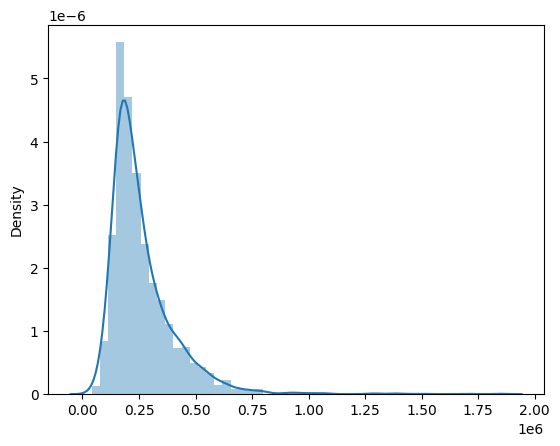

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [22]:
# Select a single column and sample and convert to pandas
sample_df = df.select(['LISTPRICE']).sample(False, .5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.show();

# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

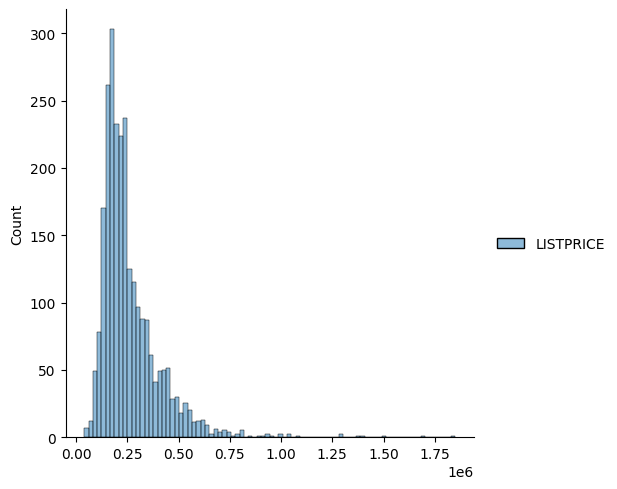

In [23]:
sns.displot(pandas_df)
plt.show();

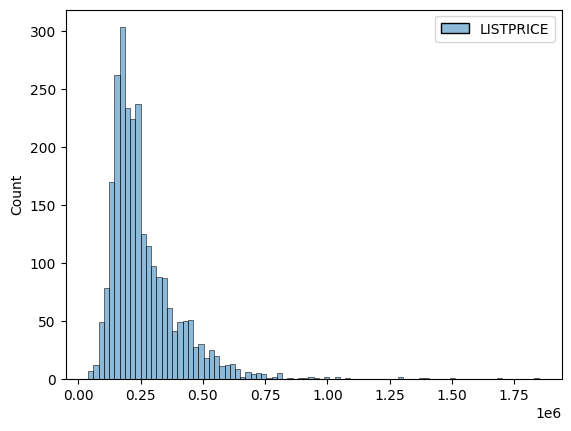

In [24]:
sns.histplot(pandas_df)
plt.show()

### Using Visualizations: lmplot
Creating linear model plots helps us visualize if variables have relationships with the dependent variable. If they do they are good candidates to include in our analysis. If they don't it doesn't mean that we should throw them out, it means we may have to process or wrangle them before they can be used.

`seaborn` is available in your workspace with the customary alias `sns`.

**Instructions**

- Using the loaded data set df filter it down to the columns `'SALESCLOSEPRICE'` and `'LIVINGAREA'` with `select()`.
- Sample 50% of the dataframe with `sample()` making sure to not use replacement and setting the random seed to 42.
- Convert the Spark DataFrame to a `pandas.DataFrame()` with `toPandas()`.
- Using `'SALESCLOSEPRICE'` as your dependent variable and `'LIVINGAREA'` as your independent, plot a linear model plot using seaborn `lmplot()`.

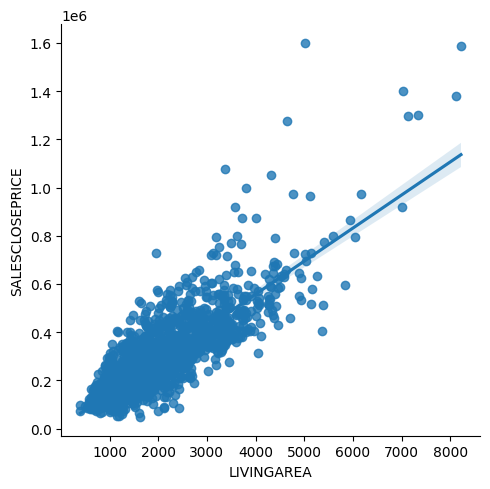

In [25]:
# Select a the relevant columns and sample
sample_df = df.select(['SALESCLOSEPRICE', 'LIVINGAREA']).sample(False, 0.5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)
plt.show();

# Wrangling with Spark Functions

## Dropping data

1. Dropping Data

More data is better right? Not if its bad data! The saying "garbage in, garbage out" is doubly true in data science!

2. Where can data go bad?

Data has a lot of places where it can get messed up. Data may be recorded incorrectly or contain extreme events. Inconsistent formatting such as mixing numeric and text data can make a field hard to use. Duplications can add redundant observations. Missing data can cause your analysis to have blind spots. Lastly, sometimes the data is just not relevant to the analysis. Failure to account for bad data can set your analysis up to fail. Please be careful!

3. Dropping Columns

Inspecting our data we can see there are some columns that are not worth including in our analysis. NO is just the record number, UNITNUMBER is the apartment or house number, and CLASS is completely constant.

4. Dropping Columns

Dropping the columns requires entering a single column name or passing a list of columns to drop. Here we pass a list called cols_to_drop to the function and then drop them. Please note the star, which tells the function to unpack the list and feed them to the function one by one.

5. Text Filtering

A common task in cleaning your data will be filtering it. Here we will filter records that contain specific text values. Where applies the filter to the dataframe records. Like creates a True/False condition for the records. The Tilde provides a way to take the opposite, or a NOT. The PySpark code reads: Filter the dataframe where the POTENTIALSHORTSALE field is NOT like the string 'Not Disclosed'

6. Outlier Filtering

For an initial pass at the model, it might be helpful to remove large outliers. One definition of an outlier for near normally distributed data is something that occurs more than 3 standard deviations from the mean, only 0-point-3% of data should be filtered. Remember outliers occur on both sides, so filter on both sides of the mean!

7. Value Filtering Example

Here we will filter extreme values from the LISTPRICE column. To start, we will use the aggregate functions standard deviation and mean. Then use collect to force the calculation to run and use the zero, zero index to access the values. Lastly we created a multi-conditional filter, which is just two boolean statements ANDed together. It reads, filter where the LISTPRICE is less than the hi_bound and more than the low_bound.

8. Dropping NA's or NULLs

Dealing with missing data is something we will cover later as dropping data is usually a naive approach. Nevertheless, it is important to sometimes take shortcuts to quickly prove out the basis for further work. Dropna does what you'd expect it to do. In its basic form, it will remove a record where there is any null value in any column. You can get more specific as we'll see on the next slide.

9. Dropping NA's or NULLs

In the first example, we drop any record contains a NULL value. The second example we will look at only two columns and if both are NULL then we will remove the record. Lastly, we can apply a threshold across all the columns and say if more than two columns contain NULL values, remove the entire record.

10. Dropping Duplicates

Duplicates occur when two or more records contain the exact same information. Often this can happen after you drop columns or join datasets. dropDuplicates will drop the first duplicate it finds. Since Spark is distributed, which one it finds first may or may not be in the order of how your file was loaded. If you want to be more picky about where you are looking for duplicates you can specify a list of column names to look for them there specifically.

11. Let's practice!

In this video, we learned why we might have bad data and several ways to remove it so it doesn't adversely impact our analysis. Let's see you take a shot at removing some data in the exercises!



### Dropping a list of columns
Our data set is rich with a lot of features, but not all are valuable. We have many that are going to be hard to wrangle into anything useful. For now, let's remove any columns that aren't immediately useful by dropping them.

- `'STREETNUMBERNUMERIC'`: The postal address number on the home
- `'FIREPLACES'`: Number of Fireplaces in the home
- `'LOTSIZEDIMENSIONS'`: Free text describing the lot shape
- `'LISTTYPE'`: Set list of values of sale type
- `'ACRES'`: Numeric area of lot size

'**Instructions**

- Read the list of column descriptions above and explore their top 30 values with `how()`, the dataframe is already filtered to the listed columns as `df`
- Create a list of two columns to drop based on their lack of relevance to predicting house prices called `cols_to_drop`. Recall that computers only interpret numbers explicitly and don't understand context.
- Use the `drop()` function to remove the columns in the list `cols_to_drop` from the dataframe `df`.

In [26]:
# backup the original DF and select only the columns needed in the practise 
df_full = df
cols_remaining = ['STREETNUMBERNUMERIC','FIREPLACES','LOTSIZEDIMENSIONS', 'LISTTYPE', 'ACRES']
df = df.select(cols_remaining)
df.show(5)

+-------------------+----------+-----------------+---------------+-----+
|STREETNUMBERNUMERIC|FIREPLACES|LOTSIZEDIMENSIONS|       LISTTYPE|ACRES|
+-------------------+----------+-----------------+---------------+-----+
|              11511|         0|          279X200|Exclusive Right| 1.28|
|              11200|         0|          100x140|Exclusive Right| 0.32|
|               8583|         0|          120x296|Exclusive Right|0.822|
|               9350|         1|          208X208|Exclusive Right| 0.94|
|               2915|         1|          116x200|Exclusive Right|  0.0|
+-------------------+----------+-----------------+---------------+-----+
only showing top 5 rows



In [27]:
# Show top 30 records
df.show(30)

# List of columns to remove from dataset
cols_to_drop = ['STREETNUMBERNUMERIC', 'LOTSIZEDIMENSIONS']

# Drop columns in list
df = df.drop(*cols_to_drop)

+-------------------+----------+--------------------+---------------+-----+
|STREETNUMBERNUMERIC|FIREPLACES|   LOTSIZEDIMENSIONS|       LISTTYPE|ACRES|
+-------------------+----------+--------------------+---------------+-----+
|              11511|         0|             279X200|Exclusive Right| 1.28|
|              11200|         0|             100x140|Exclusive Right| 0.32|
|               8583|         0|             120x296|Exclusive Right|0.822|
|               9350|         1|             208X208|Exclusive Right| 0.94|
|               2915|         1|             116x200|Exclusive Right|  0.0|
|               3604|         1|              50x150|Exclusive Right|0.172|
|               9957|         0|              common|Exclusive Right| 0.05|
|               9934|         0|              common|Exclusive Right| 0.05|
|               9926|         0|              common|Exclusive Right| 0.05|
|               9928|         0|              common|Exclusive Right| 0.05|
|           

### Using text filters to remove records
It pays to have to ask your clients lots of questions and take time to understand your variables. You find out that Assumable mortgage is an unusual occurrence in the real estate industry and your client suggests you exclude them. In this exercise we will use `isin()` which is similar to `like()` but allows us to pass a list of values to use as a filter rather than a single one.

**Instructions**

- Use `select()` and `show()` to inspect the distinct values in the column `'ASSUMABLEMORTGAGE'` and create the list `yes_values` for all the values containing the string `'Yes'`.
- Use `~df['ASSUMABLEMORTGAGE']`, `isin()`, and `.isNull()` to create a NOT filter to remove records containing corresponding values in the list `yes_values` and to keep records with null values. Store this filter in the variable `text_filter`.
- Use `where()` to apply the `text_filter` to `df`.
- Print out the number of records remaining in `df`.

In [28]:
#Return back to the full DF using the backup
df= df_full
# Inspect unique values in the column 'ASSUMABLEMORTGAGE'
df.select(['ASSUMABLEMORTGAGE']).distinct().show()

+-------------------+
|  ASSUMABLEMORTGAGE|
+-------------------+
|  Yes w/ Qualifying|
| Information Coming|
|               null|
|Yes w/No Qualifying|
|      Not Assumable|
+-------------------+



In [29]:
# Inspect unique values in the column 'ASSUMABLEMORTGAGE'
df.select(['ASSUMABLEMORTGAGE']).distinct().show()

# List of possible values containing 'yes'
yes_values = ['Yes w/ Qualifying', 'Yes w/No Qualifying']

# Filter the text values out of df but keep null values
text_filter = ~df['ASSUMABLEMORTGAGE'].isin(yes_values) | df['ASSUMABLEMORTGAGE'].isNull()
df = df.where(text_filter)

# Print count of remaining records
print(df.count())

+-------------------+
|  ASSUMABLEMORTGAGE|
+-------------------+
|  Yes w/ Qualifying|
| Information Coming|
|               null|
|Yes w/No Qualifying|
|      Not Assumable|
+-------------------+

4976


### Filtering numeric fields conditionally
Again, understanding the context of your data is extremely important. We want to understand what a normal range of houses sell for. Let's make sure we exclude any outlier homes that have sold for significantly more or less than the average. Here we will calculate the mean and standard deviation and use them to filer the near normal field `log_SalesClosePrice`.

**Instructions**

- Import `mean()` and `stddev()` from `pyspark.sql.functions`.
- Use `agg()` to calculate the mean and standard deviation for `'log_SalesClosePrice'` with the imported functions.
- Create the upper and lower bounds by taking `mean_val` +/- 3 times `stddev_val`.
- Create a `where()` filter for `'log_SalesClosePrice'` using both `low_bound` and `hi_bound`.

In [30]:
#Create the log_SalesClosePrice as in the practise
df= df_full
#log10 and log2 seems not the rights ones, the log1p provided the correct  statistics 
#Docs https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.log1p.html
from pyspark.sql.functions import log1p
df = df.withColumn('log_SalesClosePrice', log1p(df['SalesClosePrice']))
df.columns
df.select('log_SalesClosePrice').show(5)

+-------------------+
|log_SalesClosePrice|
+-------------------+
| 11.870606902224587|
| 12.154784614286667|
| 12.323860125621126|
| 12.487488878546145|
| 12.428820118415677|
+-------------------+
only showing top 5 rows



In [31]:
#Make sure the statistics matches in the practise
from pyspark.sql.functions import mean, stddev, min, max
min_val = df.agg({'log_SalesClosePrice': 'min'}).collect()[0][0]
max_val = df.agg({'log_SalesClosePrice': 'max'}).collect()[0][0]

print(min_val,max_val)
# Calculate values used for outlier filtering
mean_val = df.agg({'log_SalesClosePrice': 'mean'}).collect()[0][0]
stddev_val = df.agg({'log_SalesClosePrice': 'stddev'}).collect()[0][0]

print(mean_val, stddev_val)

10.778977123006351 14.346139397261565
12.369720943418447 0.454080629857895


In [32]:
from pyspark.sql.functions import mean, stddev

# Calculate values used for outlier filtering
mean_val = df.agg({'log_SalesClosePrice': 'mean'}).collect()[0][0]
stddev_val = df.agg({'log_SalesClosePrice': 'stddev'}).collect()[0][0]

# Create three standard deviation (μ ± 3σ) lower and upper bounds for data
low_bound = mean_val - (3 * stddev_val)
hi_bound = mean_val + (3 * stddev_val)

# Filter the data to fit between the lower and upper bounds
df = df.where((df['log_SalesClosePrice'] < hi_bound) & (df['log_SalesClosePrice'] > low_bound))

## Adjusting Data
1. Adjusting Data

Jeff Hooper of Bell labs once said, "data does not give up its secrets easily, it must be tortured to confess." This lesson will arm you with the tools to get your data to behave.

2. Why Transform Data?

Real data is ugly and rarely comes ready to be analyzed. Many algorithms and statistical methods have assumptions that a variable conforms to. If our data doesn't fit these criteria all hope isn't lost yet, we can try mathematical operations to adjust the data to become the beautiful butterflies our methods require.

3. What is MinMax Scaling

One common transformation is scaling. For many algorithms like KNN or regression, you need to ensure all your variables are on the same scale. One variable can't be from -1000 to 5000 and another between point-01 and point-02, these algorithms will try to reduce the errors in the first variable much more than the second. We can avoid this by scaling each feature between 0 and 1. This is called Minmax scaling and doesn't change the shape of the distribution of only its range. To Minmax scale, take the variable to be scaled, subtract the minimum value and divide by the difference between the max and min.

4. Minmax Scaling

To scale our data we need to first find the min and max values of the column we want to scale. Here we are using aggregate functions min and max. We will use collect to force the calculation to run and use the zero, zero index to access the values. To create a new column we will use withColumn that creates a new column based off some sort of transformation to an existing one, in this case, DAYSONMARKET. Lastly, we can see that our values are now all between 0 and 1.

5. What is Standardization?

Another common restriction is that the data must closely follow the standard normal distribution. Standardization or z-transforming is the process of shifting and scaling your data to better resemble a standard normal distribution, which has mean of 0 and standard deviation 1. In the image, you can see how the original data in blue, shifts to the green where it has mean 0 and the final step scales it to the standard normal distribution in red.

6. Standardization

To z transform our data, we calculate the aggregate functions mean and std deviation of the column we are transforming. Since want to use the values in the next step we will use collect to immediately calculate them and use the index values of [0][0] to access the returned values. We can then apply the standardization formula to our column and put the results in a new column ztrans_days by using withColumn. Lastly, we can verify that the transformed data does have approximate mean 0 and std deviation of 1.

7. What is Log Scaling

Our data for SALESCLOSEPRICE is pushed to the left. This is called positive skew. One potential way to treat skewed data is to apply a log transformation on the data. This has the impact of making our data look more like a normal distribution.

8. Log Scaling

To apply a log transformation you will need to import the log function from pyspark sql functions. We can then create a new column log_SalesClosePrice based on the application of the log function on SALESCLOSEPRICE.

9. Let's practice!

In this video, you learned why and how to apply transformations to your data. Now its time for you to adjust some data!

### Custom Percentage Scaling
In the slides we showed how to scale the data between 0 and 1. Sometimes you may wish to scale things differently for modeling or display purposes.

**Instructions**

- Calculate the max and min of `DAYSONMARKET` and put them into variables `max_days` and `min_days`, don't forget to use `collect()` on `agg()`.
- Using `withColumn()` create a new column called `'percentagescaleddays'` based on `DAYSONMARKET`.
- `percentage_scaled_days` should be a column of integers ranging from 0 to 100, use `round()` to get integers.
- Print the `max()` and `min()` for the new column `percentage_scaled_days`.

In [33]:
from pyspark.sql.functions import round

In [34]:
# Define max and min values and collect them
max_days = df.agg({'DAYSONMARKET': 'max'}).collect()[0][0]
min_days = df.agg({'DAYSONMARKET': 'min'}).collect()[0][0]

# Create a new column based off the scaled data
df = df.withColumn('percentage_scaled_days', 
                  round((df['DAYSONMARKET'] - min_days) / (max_days - min_days)) * 100)

# Calc max and min for new column
print(df.agg({'percentage_scaled_days': 'min'}).collect())
print(df.agg({'percentage_scaled_days': 'max'}).collect())

[Row(min(percentage_scaled_days)=0.0)]
[Row(max(percentage_scaled_days)=100.0)]


### Scaling your scalers
In the previous exercise, we minmax scaled a single variable. Suppose you have a LOT of variables to scale, you don't want hundreds of lines to code for each. Let's expand on the previous exercise and make it a function.

**Instructions**

- Define a function called `min_max_scaler` that takes parameters df a dataframe and `cols_to_scale` the list of columns to scale.
- Use a for loop to iterate through each column in the list and minmax scale them.
- Return the dataframe df with the new columns added.
- Apply the function `min_max_scaler()` on `df` and the list of columns `cols_to_scale`.

In [35]:
cols_to_scale = ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES']

In [36]:
def min_max_scaler(df, cols_to_scale):
  # Takes a dataframe and list of columns to minmax scale. Returns a dataframe.
    for col in cols_to_scale:
        # Define min and max values and collect them
        max_days = df.agg({col: 'max'}).collect()[0][0]
        min_days = df.agg({col: 'min'}).collect()[0][0]
        new_column_name = 'scaled_' + col
        # Create a new column based off the scaled data
        df = df.withColumn(new_column_name, 
                          (df[col] - min_days) / (max_days - min_days))
    return df
#print(cols_to_scale)
df = min_max_scaler(df, cols_to_scale)
# Show that our data is now between 0 and 1
df[['DAYSONMARKET', 'scaled_DAYSONMARKET']].show()

+------------+--------------------+
|DAYSONMARKET| scaled_DAYSONMARKET|
+------------+--------------------+
|          10|0.044444444444444446|
|           4|0.017777777777777778|
|          28| 0.12444444444444444|
|          19| 0.08444444444444445|
|          21| 0.09333333333333334|
|          17| 0.07555555555555556|
|          32| 0.14222222222222222|
|           5|0.022222222222222223|
|          23| 0.10222222222222223|
|          73|  0.3244444444444444|
|          80| 0.35555555555555557|
|          79|  0.3511111111111111|
|          12| 0.05333333333333334|
|           1|0.004444444444444...|
|          18|                0.08|
|           2|0.008888888888888889|
|          12| 0.05333333333333334|
|          45|                 0.2|
|          31| 0.13777777777777778|
|          16| 0.07111111111111111|
+------------+--------------------+
only showing top 20 rows



### Correcting Right Skew Data
In the slides we showed how you might use log transforms to fix positively skewed data (data whose distribution is mostly to the left). To correct negative skew (data mostly to the right) you need to take an extra step called "reflecting" before you can apply the inverse of $\log$, written as (1/ $\log$) to make the data look more like normal a normal distribution. Reflecting data uses the following formula to reflect each value: 
$(x_{\text{max}} +1) – x$.

**Instructions**

- Use the aggregate function `skewness()` to verify that `'YEARBUILT'` has negative skew.
- Use the `withColumn()` to create a new column `'Reflect_YearBuilt'` and reflect the values of `'YEARBUILT'`.
- Using `'Reflect_YearBuilt'` column, create another column `'adj_yearbuilt'` by taking `1/log()` of the values.



In [37]:
from pyspark.sql.functions import skewness

In [38]:
from pyspark.sql.functions import log

# Compute the skewness
print(df.agg({'YEARBUILT': 'skewness'}).collect())

# Calculate the max year
max_year = df.agg({'YEARBUILT': 'max'}).collect()[0][0]

# Create a new column of reflected data
df = df.withColumn('Reflect_YearBuilt', (max_year + 1) - df['YEARBUILT'])

# Create a new column based reflected data
df = df.withColumn('adj_yearbuilt', 1 / log(df['Reflect_YearBuilt']))

[Row(skewness(YEARBUILT)=-0.24797344910486546)]


## Working with Missing Data
1. Working with Missing Data

Missing data is frustrating, in this lesson we will touch on a few ways to handle it.

2. How does data go missing in the digital age?

How does data go missing in the digital age? Sensors can fail, surveys can miss people or new ways to measure things can cause gaps in data sets. Data storage rules can force data that doesn't fit the specified type to be null. For example dates in different formats, abbreviations or a currency with a comma instead of a period. Joining datasets can enrich your model but can induce missing values if they are not at captured at the same granularity. If you combine daily data with monthly data, it will create gaps for all the days where the monthly data was not captured. Lastly, data can be missing intentionally, attributes used in combination might be enough to compromise privacy. This can be seen in government datasets like the census where they will omit data if there is a concern.

3. Types of Missing

Understanding why your data is missing is important. Missing Completely at Random occurs when the data is missing with no pattern. Your data is likely still representative of the whole population. Missing at Random occurs when the probability of missing data on the Y variable is unrelated to the value of Y. For example, suppose males are less likely to answer a depression survey; this has no relationship with their level of depression, after accounting for maleness. Missing not at random is when the value that is missing is related to the reason why it is missing. Supposing that people with severe health problems do not answer a question asking them to rank their health would indicate missing not at random.

4. Assessing Missing Values

Earlier we showed how to use the function dropna but we didn't talk about when to use it. If your data only has a few missing values and they are missing completely at random it may be fine to remove the rows. But how can we check to see how many missing values we have in our dataset though? We can use the isNull function. It returns true if the condition is true. Here we use it to filter our data to records where they are NULL and then count them.

5. Plotting Missing Values

We can also use seaborn to help us visualize missing values by leveraging the heatmap function. Using the same steps as before where we sample our data, convert it and then use seaborn to plot the heat map. Note we use pandas DataFrame isnull to convert the dataframe into a T/F for null values.

6. Missing Values Heatmap

Here we can see the missing values as white spaces in the chart.

7. Imputation of Missing Values

Another way to handle missing values is to replace them. The replacement value might be based on business rules such as missing sales means there were no sales and replace with 0. If the data is missing completely at random, it may make sense to impute them using the mean or the median. Another option could be to use interpolation, creating another model to predict the values. Replacing values shouldn't be done without some serious considerations; make sure you research the appropriateness.

8. Imputation of Missing Values

To replace missing values we will use pyspark's fillna which takes the value to use for replacement as well as a list of column names. Here we replace values with 0 We can also replace values with the mean by calculating it using an aggregate function and use collect to force the calculation immediately and then access the value by using the zero, zero index. Then col_mean only needs to be placed in the fillna function.

9. Let's practice!

In this video, you learned about types of missing data, how to assess missing values and some methods to treat them. Take some time to do the exercises and try out what you learned.

### Visualizing Missing Data
Being able to plot missing values is a great way to quickly understand how much of your data is missing. It can also help highlight when variables are missing in a pattern something that will need to be handled with care lest your model be biased.

Which variable has the most missing values? Run all lines of code except the last one to determine the answer. Once you're confident, and fill out the value and hit "Submit Answer".

**Instructions**

- Use `select()` to subset the dataframe df with the list of columns columns and Sample with the provided `sample()` function, and assign this dataframe to the variable `sample_df`.
- Convert the Subset dataframe to a pandas dataframe `pandas_df`, and use pandas `isnull()` to convert it DataFrame into True/False. Store this result in `tf_df`.
- Use seaborn's `heatmap()` to plot `tf_df`.
- Hit "Run Code" to view the plot. Then assign the name of the variable with most missing values to `answer`.

In [39]:
columns = ['APPLIANCES', 'BACKONMARKETDATE', 'ROOMFAMILYCHAR', 'BASEMENT', 'DININGROOMDESCRIPTION']

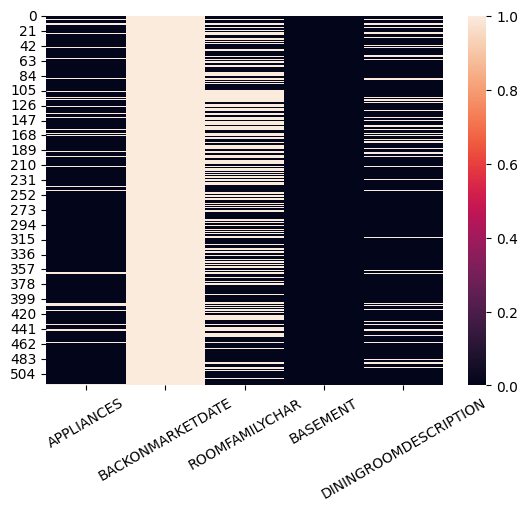

In [40]:
# Sample the dataframe and convert to Pandas
#print(columns)
sample_df = df.select(columns).sample(False, 0.1, 42)
pandas_df = sample_df.toPandas()

# Convert all values to T/F
tf_df = pandas_df.isnull()

# Plot it
sns.heatmap(data=tf_df)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

# Set the answer to the column with the most missing data
answer = 'BACKONMARKETDATE'

### Imputing Missing Data
Missing data happens. If we make the assumption that our data is missing completely at random, we are making the assumption that what data we do have, is a good representation of the population. If we have a few values we could remove them or we could use the mean or median as a replacement. In this exercise, we will look at `'PDOM'`: Days on Market at Current Price.

**Instructions**

- Get a count of the missing values in the column `'PDOM'` using `where()`, `isNull()` and `count()`.
- Calculate the mean value of `'PDOM'` using the aggregate function `mean()`.
- Use `fillna()` with the value set to the `'PDOM'` mean value and only apply it to the column `'PDOM'` using the subset parameter.

In [41]:
# Count missing rows
missing = df.where(df['PDOM'].isNull()).count()

# Calculate the mean value
col_mean = df.agg({'PDOM': 'mean'}).collect()[0][0]

# Replacing with the mean value for that column
df.fillna(col_mean, subset=['PDOM'])

DataFrame[No.: int, MLSID: string, StreetNumberNumeric: int, streetaddress: string, STREETNAME: string, PostalCode: int, StateOrProvince: string, City: string, SalesClosePrice: int, LISTDATE: string, LISTPRICE: int, LISTTYPE: string, OriginalListPrice: int, PricePerTSFT: double, FOUNDATIONSIZE: int, FENCE: string, MapLetter: string, LotSizeDimensions: string, SchoolDistrictNumber: string, DAYSONMARKET: int, offmarketdate: string, Fireplaces: int, RoomArea4: string, roomtype: string, ROOF: string, RoomFloor4: string, PotentialShortSale: string, PoolDescription: string, PDOM: int, GarageDescription: string, SQFTABOVEGROUND: int, Taxes: int, RoomFloor1: string, RoomArea1: string, TAXWITHASSESSMENTS: double, TAXYEAR: int, LivingArea: int, UNITNUMBER: string, YEARBUILT: int, ZONING: string, STYLE: string, ACRES: double, CoolingDescription: string, APPLIANCES: string, backonmarketdate: int, ROOMFAMILYCHAR: string, RoomArea3: string, EXTERIOR: string, RoomFloor3: string, RoomFloor2: string, R

### Calculate Missing Percents
Automation is the future of data science. Learning to automate some of your data preparation pays dividends. In this exercise, we will automate dropping columns if they are missing data beyond a specific threshold.

**Instructions**

- Define a function `column_dropper()` that takes the parameters df a dataframe and threshold a float between 0 and 1.
- Calculate the percentage of values that are missing using `where()`, `isNull()` and `count()`.
- Check to see if the percentage of missing is higher than the threshold, if so, drop the column using `drop()`.
- Run `column_dropper()` on df with the threshold set to .6

In [42]:
from pyspark.sql.functions import col, isnull
from pyspark.sql import Column, Row

In [43]:
df = df.withColumnRenamed("No.", "No")

In [44]:
len(df.columns)

81

In [45]:
def column_dropper(df, threshold):
    # Takes a dataframe and threshold for missing values. Returns a dataframe.
    total_records = df.count()
    for col in df.columns:
        # Calculate the percentage of missing values
        missing = df.where(isnull(df[col])).count()
        missing_percent = missing / total_records
        # Drop column if percent of missing is more than threshold
        if missing_percent > threshold:
            df = df.drop(col)
    return df

# Drop columns that are more than 60% missing
df = column_dropper(df, 0.6)

In [46]:
len(df.columns)

75

## Getting More Data
1. Getting More Data

The world of Big Data means having access to much more information to include in our analysis. In this video, we will cover how to connect additional data to our dataset.

2. Thoughts on External Data Sets

External data is a wonderful way to boost model performance but there are pros and cons to choosing to include it. Adding external data may add excellent predictors for a model but adding too many features may impact the performance of the model. There is a serious risk of spurious correlations between variables in the world of big data. External data can be a great way to replace missing or aggregated values with a better feature. Adding data comes at the risk of inducing data leakage. If we wish to include local crime information, we will have to ensure that buyers would also have access to that information at the time of purchasing a home. To include data available later is leaking information from the future. Another consideration is how cheap and easy it is to obtain. Today we have many more datasets easily available to us but this may come at the cost of us needing to become the subject matter experts to know the meaning and credibility of our sources.

3. About Joins

To understand the different kinds of joins we'll need to orient ourselves. We will call the original data set we started with the "Left" and the one we wish to incorporate our "Right". There are many ways to join data together most commonly the Inner or Left joins depending on your goals. For us, we want to make sure we ALWAYS keep the full LEFT dataset and add data where available from the RIGHT. This means we will be using a LEFT JOIN.

4. PySpark DataFrame Joins

Joins can be done one of two ways in Pyspark. First is the dataframe join method. The dataframe that calls join is the LEFT dataframe. other is the right dataframe, in this case, the new dataset. on is the pairs of column conditions we will match on. how is the type of join to perform.

5. PySpark Join Example

Suppose we want to see the impact of homes sold on bank holidays. We can join the dataframes together by creating a join condition where df OFFMARKETDATE equals hdf dt We then can put this condition into our join function and use 'left' to make sure we keep all the original records in df. Lastly, count holiday sales by using the tilde to take the NOT of isNull. Not surprising, no houses are sold on a bank holidays, perhaps later we can check if a holiday week impacts sales

6. SparkSQL Join

The second way we can join dataframes together is to use Spark SQL which allows us to apply SQL statments directly to dataframes. This may be your preferred method if you are familiar with SQL or attempting to do complicated joins or filters. To do this we need to register the dataframe as temp table and give it a name. Once that's done we can then use spark sql to execute a query and return it back in the form of a dataframe. In this one, we are using SELECT star to get all of the columns available, using FROM df to create our starting table, LEFT JOIN hdf as the table we'd like to join with and using ON df OFFMARKETDATE equals hdf dt to create the join condition.

7. Let's Join Some Data!

In this video, we learned combining datasets can be powerful but requires some caution. We also learned how to join data in two different ways. In the exercises, we will build on these and learn some things to watch out for!

### A Dangerous Join
In this exercise, we will be joining on Latitude and Longitude to bring in another dataset that measures how walk-friendly a neighborhood is. We'll need to be careful to make sure our joining columns are the same data type and ensure we are joining on the same precision (number of digits after the decimal) or our join won't work!

Below you will find that `df['latitude']` and `df['longitude']` are at a higher precision than `walk_df['longitude']` and `walk_df['latitude']` we'll need to round them to the same precision so the join will work correctly.

**Instructions**

- Convert `walk_df['latitude']` and `walk_df['longitude']` to type double by using `cast('double')` on the column and replacing the column in place `withColumn()`.
- Round the columns in place with `withColumn()` and `round('latitude', 5)` and `round('longitude', 5)`.
- Create the join condition of `walk_df['latitude']` matching `df['latitude']` and `walk_df['longitude']` matching `df['longitude']`.
- Join `df` and `walk_df` together with `join()`, using the condition above and the left join type. Save the joined dataframe as `join_df`.

In [47]:
# This cell should be used to import the walk_df dataset once they send it


In [48]:
'''
# Cast data types
walk_df = walk_df.withColumn('latitude', walk_df['latitude'].cast('double'))
walk_df = walk_df.withColumn('longitude', walk_df['longitude'].cast('double'))

# Round precision
df = df.withColumn('longitude', round('longitude', 5))
df = df.withColumn('latitude', round('latitude', 5))

# Create join condition
condition = [walk_df['latitude'] == df['latitude'], walk_df['longitude'] == df['longitude']]

# Join the dataframes together
join_df = df.join(walk_df, on=condition, how='left')
# Count non-null records from new field
print(join_df.where(~join_df['walkscore'].isNull()).count())
'''

"\n# Cast data types\nwalk_df = walk_df.withColumn('latitude', walk_df['latitude'].cast('double'))\nwalk_df = walk_df.withColumn('longitude', walk_df['longitude'].cast('double'))\n\n# Round precision\ndf = df.withColumn('longitude', round('longitude', 5))\ndf = df.withColumn('latitude', round('latitude', 5))\n\n# Create join condition\ncondition = [walk_df['latitude'] == df['latitude'], walk_df['longitude'] == df['longitude']]\n\n# Join the dataframes together\njoin_df = df.join(walk_df, on=condition, how='left')\n# Count non-null records from new field\nprint(join_df.where(~join_df['walkscore'].isNull()).count())\n"

### Spark SQL Join
Sometimes it is much easier to write complex joins in SQL. In this exercise, we will start with the join keys already in the same format and precision but will use SparkSQL to do the joining.

**Instructions**

- Register the Dataframes as SparkSQL tables with `createOrReplaceTempView`, name them the `df` and `walk_df` respectively.
- In the `join_sql` string, set the left table to `df` and the right table to `walk_df`
- Call `spark.sql()` on the `join_sql` string to perform the join.

In [49]:
'''
# Register dataframes as tables
df.createOrReplaceTempView("df")
walk_df.createOrReplaceTempView("walk_df")

# SQL to join dataframes
join_sql = 	"""
            SELECT 
                *
            FROM df
            LEFT JOIN walk_df
            ON df.longitude = walk_df.longitude
            AND df.latitude = walk_df.latitude
            """
# Perform sql join
joined_df = spark.sql(join_sql)
'''

'\n# Register dataframes as tables\ndf.createOrReplaceTempView("df")\nwalk_df.createOrReplaceTempView("walk_df")\n\n# SQL to join dataframes\njoin_sql = \t"""\n            SELECT \n                *\n            FROM df\n            LEFT JOIN walk_df\n            ON df.longitude = walk_df.longitude\n            AND df.latitude = walk_df.latitude\n            """\n# Perform sql join\njoined_df = spark.sql(join_sql)\n'

### Checking for Bad Joins
Joins can go bad silently if we are not careful, meaning they will not error out but instead return mangled data with more or less data than you'd intended. Let's take a look at a couple ways that joining incorrectly can change your data set for the worse.

In this example we will look at what happens if you join two dataframes together when the join keys are not the same precision and compare the record counts between the correct join and the incorrect one.

**Instructions**

- Create a join between `df_orig`, the dataframe before its precision was corrected, and `walk_df` that matches on longitude and latitude in the respective dataframes.
- Count the number of missing values with `where()` `isNull()` on `df['walkscore']` and `correct_join['walkscore']`. You should notice that there are many missing values because our datatypes and precision do not match.
- Create a join between `df` and `walk_df` that only matches on longitude
- Count the number of records with `count()`: few_keys_df and `correct_join_df`. You should notice that there are many more values as we have not constrained our matching correctly.

In [50]:
#This cell should be used to create the right condition df and the origial df

In [51]:
'''
# Join on mismatched keys precision 
wrong_prec_cond = [df_orig['longitude'] == walk_df['longitude'], df_orig['latitude'] == walk_df['latitude']]
wrong_prec_df = df_orig.join(walk_df, on=wrong_prec_cond, how='left')

# Compare bad join to the correct one
print(wrong_prec_df.where(wrong_prec_df['walkscore'].isNull()).count())
print(correct_join_df.where(correct_join_df['walkscore'].isNull()).count())

# Create a join on too few keys
few_keys_cond = [df['longitude'] == walk_df['longitude']]
few_keys_df = df.join(walk_df, on=few_keys_cond, how='left')

# Compare bad join to the correct one
print("Record Count of the Too Few Keys Join Example: " + str(few_keys_df.count()))
print("Record Count of the Correct Join Example: " + str(correct_join_df.count()))
'''

'\n# Join on mismatched keys precision \nwrong_prec_cond = [df_orig[\'longitude\'] == walk_df[\'longitude\'], df_orig[\'latitude\'] == walk_df[\'latitude\']]\nwrong_prec_df = df_orig.join(walk_df, on=wrong_prec_cond, how=\'left\')\n\n# Compare bad join to the correct one\nprint(wrong_prec_df.where(wrong_prec_df[\'walkscore\'].isNull()).count())\nprint(correct_join_df.where(correct_join_df[\'walkscore\'].isNull()).count())\n\n# Create a join on too few keys\nfew_keys_cond = [df[\'longitude\'] == walk_df[\'longitude\']]\nfew_keys_df = df.join(walk_df, on=few_keys_cond, how=\'left\')\n\n# Compare bad join to the correct one\nprint("Record Count of the Too Few Keys Join Example: " + str(few_keys_df.count()))\nprint("Record Count of the Correct Join Example: " + str(correct_join_df.count()))\n'

# Feature Engineering

## Feature Generation
1. Feature Generation

In this video, we will learn a lot about the nuts and bolts of feature engineering. Just because it's called 'machine learning' doesn't mean that it can figure everything out on its own. So we will use some tricks to help it out by creating new features that will better capture patterns in the data. This video will cover feature generation and show you how using the new features can improve a model.

2. Why generate new features?

Why generate new features if the information is already available in the dataset? Combining features together can capture subtle dependent effects between them that impact the outcome variable. These can be represented by multiplying, summing, differencing or dividing two or more variables.

3. Why generate new features?

To see the impact of generating these features let's suppose you have two attributes, length, and width and the price of single story home. If these are your only two features how can you best create a model to predict price? They certainly don't look to be very strong features as is.

4. Combining Two Features

Taking the previous example a step further we can think about how a person might buy a home. If we use some intuition that people often consider the area of a home, we can create a new feature, Total Square Footage by multiplying the width and length. The results are much better with an R-squared of point-81! Applying your reasoning and understanding of the problem can help you build powerful predictors.

5. Other Ways to Combine Two Features

Our dataset doesn't include WIDTH and LENGTH because no one would ever actually look for a house that way. However, we don't have Total Square Footage calculated but we can create it using withColumn and by adding SQFTBELOWGROUND and SQFTABOVEGROUND together. We can build another feature, PRICEPERTSQFT using our previous feature TSQFT. This is now the combination of three independent variables. There isn't a limit to how deep you can go but interpretability of what it means starts to become difficult after three. We can create DAYSONMARKET as a difference between LISTDATE and OFFMARKETDATE. We will cover how to get LISTDATE and OFFMARKETDATE into the datetime format in the next section but for now, know that new features can be generated many ways!

6. What's the limit?

There is a major push in the data science community to automate some of the generation of features. If this is of interest to you, I'd recommend you check out the Python libraries FeatureTools and TSFresh. I will caution you that simply multiplying each feature pairwise will square your number of features. This can cause an explosion of features that can be unwieldy to model or could potentially overfit your model by pure coincidence. Many of the features may convey similar information and won't be needed Lastly, there is no limit to how many features you can combine but the interpretability certainly takes a steep dive after three. Beyond this is the realm of deep feature generation, a topic for another course!

7. Go forth and combine!

In this video, you learned that you can generate new powerful features to represent complex relations between them. Lastly, you saw that features combinations are everywhere and many are already in our dataset. It's your turn to take what you learned to build and evaluate new features generated from what's available!

### Differences
Let's explore generating features using existing ones. In the midwest of the U.S. many single family homes have extra land around them for green space. In this example you will create a new feature called `'YARD_SIZE'`, and then see if the new feature is correlated with our outcome variable.

**Instructions**

- Create a new column using `withColumn()` called `LOT_SIZE_SQFT` and convert `ACRES` to square feet by multiplying by `acres_to_sqfeet` the conversion factor.
- Create another new column called `YARD_SIZE` by subtracting `FOUNDATIONSIZE` from `LOT_SIZE_SQFT`.
- Run `corr()` on each of the independent variables `YARD_SIZE`, `FOUNDATIONSIZE`, `LOT_SIZE_SQFT` against the dependent variable `SALESCLOSEPRICE`. Does new feature show a stronger correlation than either of its components?

In [52]:
from pyspark.sql.functions import corr

In [53]:
# Lot size in square feet
acres_to_sqfeet = 43560
df = df.withColumn('LOT_SIZE_SQFT', df['ACRES'] * acres_to_sqfeet)

# Create new column YARD_SIZE
df = df.withColumn('YARD_SIZE', df['LOT_SIZE_SQFT'] - df['FOUNDATIONSIZE'])

# Corr of ACRES vs SALESCLOSEPRICE
print("Corr of ACRES vs SALESCLOSEPRICE: " + str(df.corr('ACRES', 'SALESCLOSEPRICE')))
# Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE
print("Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: " + str(df.corr('FOUNDATIONSIZE', 'SALESCLOSEPRICE')))
# Corr of YARD_SIZE vs SALESCLOSEPRICE
print("Corr of YARD_SIZE vs SALESCLOSEPRICE: " + str(df.corr('YARD_SIZE', 'SALESCLOSEPRICE')))

Corr of ACRES vs SALESCLOSEPRICE: 0.210707856427045
Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: 0.5940326167154751
Corr of YARD_SIZE vs SALESCLOSEPRICE: 0.1980334672592903


### Ratios
Ratios are all around us. Whether it's miles per gallon or click through rate, they are everywhere. In this exercise, we'll create some ratios by dividing out pairs of columns.

**Instructions**

- Create a new variable `ASSESSED_TO_LIST` by dividing `ASSESSEDVALUATION` by `LISTPRICE` to help us understand if the having a high or low assessment value impacts our price.
- Create another new variable `TAX_TO_LIST` to help us understand the approximate tax rate by dividing `TAXES` by `LISTPRICE`.
- Lastly create another variable `BED_TO_BATHS` to help us know how crowded our bathrooms might be by dividing `BEDROOMS` by `BATHSTOTAL`.

In [54]:
# ASSESSED_TO_LIST
df = df.withColumn('ASSESSED_TO_LIST', df['ASSESSEDVALUATION'] / df['LISTPRICE'])
df[['ASSESSEDVALUATION', 'LISTPRICE', 'ASSESSED_TO_LIST']].show(5)
# TAX_TO_LIST
df = df.withColumn('TAX_TO_LIST', df['TAXES'] / df['LISTPRICE'])
df[['TAX_TO_LIST', 'TAXES', 'LISTPRICE']].show(5)
# BED_TO_BATHS
df = df.withColumn('BED_TO_BATHS', df['BEDROOMS'] / df['BATHSTOTAL'])
df[['BED_TO_BATHS', 'BEDROOMS', 'BATHSTOTAL']].show(5)

+-----------------+---------+----------------+
|ASSESSEDVALUATION|LISTPRICE|ASSESSED_TO_LIST|
+-----------------+---------+----------------+
|              0.0|   139900|             0.0|
|              0.0|   210000|             0.0|
|              0.0|   225000|             0.0|
|              0.0|   230000|             0.0|
|              0.0|   239900|             0.0|
+-----------------+---------+----------------+
only showing top 5 rows

+--------------------+-----+---------+
|         TAX_TO_LIST|TAXES|LISTPRICE|
+--------------------+-----+---------+
|0.013280914939242315| 1858|   139900|
| 0.00780952380952381| 1640|   210000|
|0.010622222222222222| 2390|   225000|
|0.009330434782608695| 2146|   230000|
|0.008378491037932471| 2010|   239900|
+--------------------+-----+---------+
only showing top 5 rows

+------------------+--------+----------+
|      BED_TO_BATHS|BEDROOMS|BATHSTOTAL|
+------------------+--------+----------+
|               1.5|       3|         2|
|1.333333333

### Deeper Features
In previous exercises we showed how combining two features together can create good additional features for a predictive model. In this exercise, you will generate `'deeper'` features by combining the effects of three variables into one. Then you will check to see if deeper and more complicated features always make for better predictors.

**Instructions**

- Create a new feature by adding `SQFTBELOWGROUND` and `SQFTABOVEGROUND` and creating a new column `Total_SQFT`
- Using `Total_SQFT`, create yet another feature called `BATHS_PER_1000SQFT` with `BATHSTOTAL`. Be sure to scale `Total_SQFT` to 1000's
- Use `describe()` to inspect the new min, max and mean of our newest feature `BATHS_PER_1000SQFT`. Notice anything strange?
- Create two `jointplots()`s with `Total_SQFT` and `BATHS_PER_1000SQFT` as the $x$ values and `SALESCLOSEPRICE` as the $y$ value to see which has the better $R^2$ ($R ** 2$) fit. Does this more complicated feature have a stronger relationship with `SALESCLOSEPRICE`?

In [55]:
#!pip3 install scipy sklearn 
#!pip install -U scikit-learn scipy matplotlib

In [56]:
#import scipy.stats as stats
from sklearn.metrics import r2_score as r2

In [57]:
from warnings import filterwarnings
filterwarnings('ignore')

In [58]:
df[['SALESCLOSEPRICE']].describe().show()

+-------+------------------+
|summary|   SALESCLOSEPRICE|
+-------+------------------+
|  count|              4968|
|   mean|258700.73953301128|
| stddev| 124174.5222219254|
|    min|             61000|
|    max|            905000|
+-------+------------------+



+-------+-------------------+
|summary| BATHS_PER_1000SQFT|
+-------+-------------------+
|  count|               4968|
|   mean| 1.4327927279152162|
| stddev| 14.174291725012424|
|    min|0.39123630672926446|
|    max|             1000.0|
+-------+-------------------+



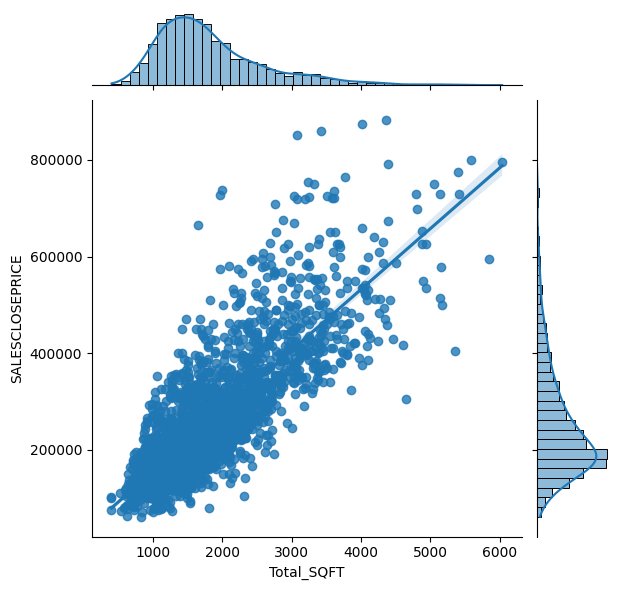

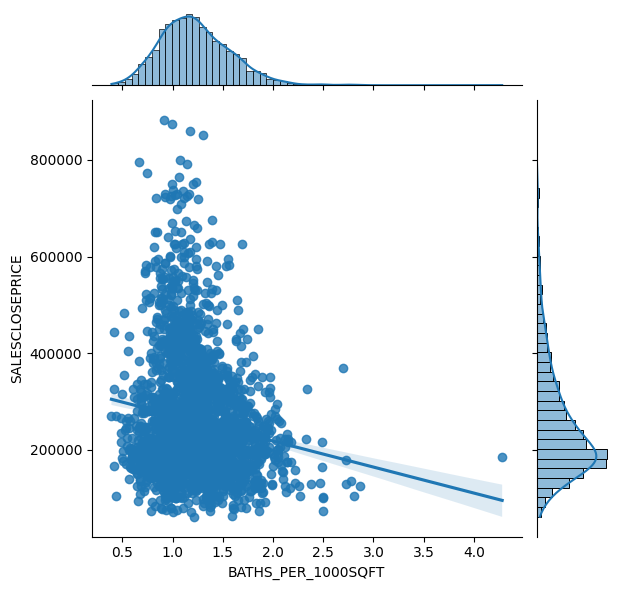

In [59]:
# Create new feature by adding two features together
df = df.withColumn('Total_SQFT', df['SQFTBELOWGROUND'] + df['SQFTABOVEGROUND'])

# Create additional new feature using previously created feature
df = df.withColumn('BATHS_PER_1000SQFT', df['BATHSTOTAL'] / (df['Total_SQFT'] / 1000))
df[['BATHS_PER_1000SQFT']].describe().show()

# Sample and create pandas dataframe
pandas_df = df[['Total_SQFT','BATHS_PER_1000SQFT', 'SALESCLOSEPRICE']].sample(False, 0.5, 0).toPandas()

# Linear model plots
sns.jointplot(x='Total_SQFT', y='SALESCLOSEPRICE', data=pandas_df, kind="reg")#, stat_func=r2)
plt.show()
sns.jointplot(x='BATHS_PER_1000SQFT', y='SALESCLOSEPRICE', data=pandas_df, kind="reg")#, stat_func=r2)
plt.show()

## Time Features
1. Time Features

In this video, we will talk about using Time in our models since it isn't as easy as throwing it into our model as a continuous variable.

2. The Cyclical Nature of Things

Things repeat; each day has a noon, each week as a Monday and each year has a January. We want to help our model by building features that help it associate cyclical events with changes in our outcome variable. Such as summer having a higher volume of homes sold than in winter.

3. Choosing the Right Level

Building the RIGHT time features is important. The high variation in the daily number of homes sold makes this pattern hard for us to see and the model to understand.

4. Choosing the Right Level

If we change the aggregation to look at grouping by month we can see the pattern much more clearly. Choosing the right level to build out time-related features is important as too granular and they are too noisy for our model, too broad and our model misses trends.

5. Treating Date Fields as Dates...

To work with dates we need them to be of Spark date type. We can do the conversion with the to_date function that takes a single column. If you wish to keep the time component use to_timestamp instead.

6. Time Components

With our data typed correctly, we can use build-ins to get various time components. One popular way to handle dates is to convert them into ordinal features like year or month using the functions year and month respectively. We can also extract more complicated things like day number in the month with dayofmonth or the week number in the year with weekofyear to further build out our features. Many more functions can be found in the pyspark sql functions docs online.

7. Basic Time Based Metrics

One simple time-based metric is the number of days a property remains in unsold from the date it was listed. Days on Market is an important feature to buyers. They may perceive that a house that has been on the market for a while has something wrong with it or that the seller may be more willing to give them a discount. We can create this metric by applying the datediff function to OFFMARKETDATE and LISTDATE columns.

8. Lagging Features

Lagging Time Features is a very common approach to add propagation time for a variable's effect to impact the outcome variable. This is similar to how a drop creates waves that take time to hit the edge of a glass. To capture this, we will shift values forwards or backward until the timings line up. To create a lagged feature we will need a few new functions. First the window function. window allows you to return a value for each record based on some calculation against a group of records such as rank or moving average. The second function is lag a window function that returns the value that is offset by rows before the current row. It takes a dataframe column as an input. Count is how many periods you wish to lag. Let's see it in action.

9. Lagging Features, the PySpark Way

For this example, we will look at lagging weekly Mortgage rates as it often takes time for people to adjust the price of their homes. To begin we will need to import our new functions. Then we create our window which will group things by our ordered DATE column, making the window weekly. Once that is done we can create a new column using the lag function, telling it to lag MORTGAGE-30-US rate by one period. The over function takes the window w so that lag knows how to compare the current record.

10. It's TIME to practice!

Now it's your turn to create some of your own time-related features with built-in datetime functions as well as more complex ones using the window function.

### Time Components
Being able to work with time components for building features is important but you can also use them to explore and understand your data further. In this exercise, you'll be looking to see if there is a pattern to which day of the week a house lists on. Please keep in mind that PySpark's week starts on Sunday, with a value of 1 and ends on Saturday, a value of 7.

**Instructions**

- Import `to_date()` and `dayofweek()` functions from `pyspark.sql.functions`
- Use the `to_date()` function to convert `LISTDATE` to a Spark date type, save the converted column in place using `withColumn()`
- Create a new column using `LISTDATE` and `dayofweek()` then save it as `List_Day_of_Week` using `withColumn()`
- Sample half the dataframe and convert it to a pandas dataframe with `toPandas()` and plot the count of the pandas dataframe's `List_Day_of_Week` column by using seaborn `countplot()` where `x` = `List_Day_of_Week`.

In [60]:
df[['LISTDATE']].show(5)

+--------------+
|      LISTDATE|
+--------------+
|7/15/2017 0:00|
|10/9/2017 0:00|
|6/26/2017 0:00|
|8/25/2017 0:00|
|9/12/2017 0:00|
+--------------+
only showing top 5 rows



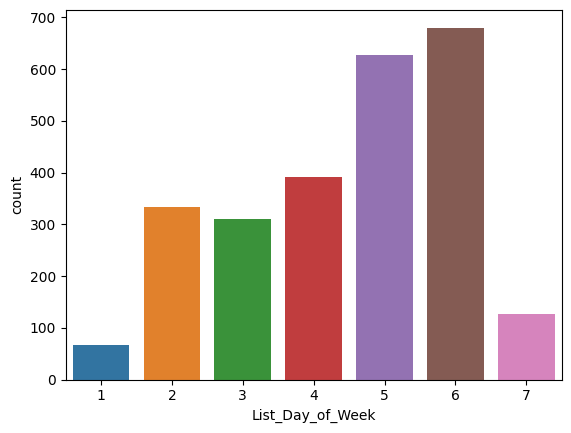

In [61]:
# Import needed functions
from pyspark.sql.functions import to_date, dayofweek

# Convert to date type
df = df.withColumn('List_date', to_date(df['LISTDATE'], 'M/d/yyyy H:mm'))

# Get the day of the week
df = df.withColumn('List_Day_of_Week', dayofweek(df['List_date']))

# Sample and convert to pandas dataframe
sample_df = df[['List_Day_of_Week']].sample(False, 0.5, 42).toPandas()

# Plot count plot of of day of week
sns.countplot(x="List_Day_of_Week", data=sample_df)
plt.show()

In [62]:
df[['LISTDATE','List_date','List_Day_of_Week']].show(5)

+--------------+----------+----------------+
|      LISTDATE| List_date|List_Day_of_Week|
+--------------+----------+----------------+
|7/15/2017 0:00|2017-07-15|               7|
|10/9/2017 0:00|2017-10-09|               2|
|6/26/2017 0:00|2017-06-26|               2|
|8/25/2017 0:00|2017-08-25|               6|
|9/12/2017 0:00|2017-09-12|               3|
+--------------+----------+----------------+
only showing top 5 rows



### Joining On Time Components
Often times you will use date components to join in other sets of information. However, in this example, we need to use data that would have been available to those considering buying a house. This means we will need to use the previous year's reporting data for our analysis.

**Instructions**

- Extract the year from `LISTDATE` using `year()` and put it into a new column called `list_year` with `withColumn()`
- Create another new column called `report_year` by subtracting 1 from the `list_year`
- Create a join condition that matches `df['CITY']` with `price_df['City']` and `df['report_year']` with `price_df['Year']`
- Perform a left join between `df` and `price_df`

In [63]:
'''
from pyspark.sql.functions import year

# Initialize dataframes
df = real_estate_df
price_df = median_prices_df

# Create year column
df = df.withColumn('list_year', year('LISTDATE'))

# Adjust year to match
df = df.withColumn('report_year', (df['list_year'] - 1))

# Create join condition
condition = [df['CITY'] == price_df['City'], df['report_year'] == price_df['Year']]

# Join the dataframes together
df = df.join(price_df, on=condition, how='left')
# Inspect that new columns are available
df[['MedianHomeValue']].show()
'''

"\nfrom pyspark.sql.functions import year\n\n# Initialize dataframes\ndf = real_estate_df\nprice_df = median_prices_df\n\n# Create year column\ndf = df.withColumn('list_year', year('LISTDATE'))\n\n# Adjust year to match\ndf = df.withColumn('report_year', (df['list_year'] - 1))\n\n# Create join condition\ncondition = [df['CITY'] == price_df['City'], df['report_year'] == price_df['Year']]\n\n# Join the dataframes together\ndf = df.join(price_df, on=condition, how='left')\n# Inspect that new columns are available\ndf[['MedianHomeValue']].show()\n"

### Date Math
In this example, we'll look at verifying the frequency of our data. The Mortgage dataset is supposed to have weekly data but let's make sure by lagging the report date and then taking the difference of the dates.

Recall that to create a lagged feature we will need to create a `window()`. `window()` allows you to return a value for each record based off some calculation against a group of records, in this case, the previous period's mortgage rate.

**Instructions**

- Cast `mort_df['DATE']` to date type with `to_date()`
- Create a window with the `Window()` function and use `orderBy()` to sort by `mort_df[DATE]`
- Create a new column `DATE-1` using `withColumn()` by lagging the DATE column with `lag()` and window it using `over(w)`
- Calculate the difference between `DATE` and `DATE-1` using `datediff()` and name it `Days_Between_Report`

In [64]:
'''
from pyspark.sql.functions import lag, datediff, to_date
from pyspark.sql.window import Window

# Cast data type
mort_df = mort_df.withColumn('DATE', to_date(mort_df['DATE']))

# Create window
w = Window().orderBy(mort_df['DATE'])
# Create lag column
mort_df = mort_df.withColumn('DATE-1', lag(mort_df['DATE'], count=1).over(w))

# Calculate difference between date columns
mort_df = mort_df.withColumn('Days_Between_Report', datediff(mort_df['DATE'], mort_df['DATE-1']))
# Print results
mort_df.select('Days_Between_Report').distinct().show()
'''

"\nfrom pyspark.sql.functions import lag, datediff, to_date\nfrom pyspark.sql.window import Window\n\n# Cast data type\nmort_df = mort_df.withColumn('DATE', to_date(mort_df['DATE']))\n\n# Create window\nw = Window().orderBy(mort_df['DATE'])\n# Create lag column\nmort_df = mort_df.withColumn('DATE-1', lag(mort_df['DATE'], count=1).over(w))\n\n# Calculate difference between date columns\nmort_df = mort_df.withColumn('Days_Between_Report', datediff(mort_df['DATE'], mort_df['DATE-1']))\n# Print results\nmort_df.select('Days_Between_Report').distinct().show()\n"

## Extracting Features
1. Extracting Features

Datasets frequently have rich features trapped in messy combination fields, lists or even free-form text. In this video, we'll go over how to wrangle columns into useful information for machine learning.

2. Extracting Age with Text Match

We can see that within this ROOF column there are many useful features. For instance, an old roof is very expensive to replace and knowing that might impact the price of the house. The age in this dataset is either over 8 years or less. This would be better as a boolean variable, 1 or 0, something that we can calculate on.

3. Extracting Age with Text Match

To create the boolean column we will use the when function to create an if-then. The when function evaluates a boolean condition and does something. In this case our boolean conditions are find_over_8 and find_under_8 which use the like function to return true/false depending on if string is found. You might notice we use percent sign before and after the string we are looking for. These are wildcards that allow any number of characters before or after the string. Now that we have these conditions created we can put them in the when function. When find_over_8 is true, assign the value 1, when find_under_8 is true assign 0. If neither is true, the otherwise function allows us to assign None so they are null. We can see that the roof age has now been created into a new boolean variable!

4. Splitting Columns

Let's look at the ROOF column again. You'll notice that if there is a value in ROOF it seems to be a list starting with the type of materials it was made out of. If we know the pattern we can split this into its own column called Roof Material.

5. Splitting Columns

To split a column we need to introduce a new function from the pyspark sql functions module, split, which takes a column to split and a character to split on. In our example, we will split on df ROOF and use the comma as the delimiter between values. Once we have that created we can use our familiar withColumn to create a new column from the first value with split_col get Item zero. get Item zero takes the 0 index position of the split column and returns the value. Here we can verify that our code performed as expected, splitting the ROOF column and putting the first value into a new column Roof_Material.

6. Explode!

What if the order of the listed values in a column is not guaranteed and we want to extract out the values to their own columns? To do this is a two-step process. The first step is called 'exploding'. Changing a compound field so that each value has a separate record, with everything else repeated.

7. Pivot!

The second step is to pivot those repeated fields into columns. You'll notice we now have columns for each POSSIBLE value in the compound field we started with.

8. Explode & Pivot!

To do this in PySpark we have to import several functions: split, explode, lit, coalesce and first. Then we need to split our ROOF column into an array column. Now we can explode roof_list to create a new record for each value. Next we'll create a constant column to help our pivot. The pivot function will groupBy our record id number so that only one row is returned for pivoting ex_roof_list. Since pivot is an aggregate function we will use our constant_val column with coalesce to ignore nulls and first to take the first value.

9. Let's wrangle some features!

In this video, we learned how to salvage some messy fields into machine learnable features. Now it's your turn to wrangle some features on your own!

### Extracting Text to New Features
Garages are an important consideration for houses in Minnesota where most people own a car and the snow is annoying to clear off a car parked outside. The type of garage is also important, can you get to your car without braving the cold or not? Let's look at creating a feature `has_attached_garage` that captures whether the garage is attached to the house or not.

**Instructions**

- Import the needed function `when()` from `pyspark.sql.functions`.
- Create a string matching condition using `like()` to look for for the string pattern Attached Garage in `df['GARAGEDESCRIPTION']` and use wildcards `%` so it will match anywhere in the field.
- Similarly, create another condition using `like()` to find the string pattern Detached Garage in `df['GARAGEDESCRIPTION']` and use wildcards `%` so it will match anywhere in the field.
- Create a new column `has_attached_garage` using `when()` to assign the value 1 if it has an attached garage, zero if detached and use `otherwise()` to assign null with `None` if it is neither.

In [66]:
# Import needed functions
from pyspark.sql.functions import when

# Create boolean conditions for string matches
has_attached_garage = df['GARAGEDESCRIPTION'].like('%Attached Garage%')
has_detached_garage = df['GARAGEDESCRIPTION'].like('%Detached Garage%')

# Conditional value assignment 
df = df.withColumn('has_attached_garage', (when(has_attached_garage, 1)
                                          .when(has_detached_garage, 0)
                                          .otherwise(None)))

# Inspect results
df[['GARAGEDESCRIPTION', 'has_attached_garage']].show(truncate=100)

+------------------------------------------------------------------+-------------------+
|                                                 GARAGEDESCRIPTION|has_attached_garage|
+------------------------------------------------------------------+-------------------+
|                                                   Attached Garage|                  1|
|           Attached Garage, Driveway - Asphalt, Garage Door Opener|                  1|
|                                                   Attached Garage|                  1|
|    Attached Garage, Detached Garage, Tuckunder, Driveway - Gravel|                  1|
|           Attached Garage, Driveway - Asphalt, Garage Door Opener|                  1|
|                               Attached Garage, Driveway - Asphalt|                  1|
|           Attached Garage, Driveway - Asphalt, Garage Door Opener|                  1|
|                                                   Attached Garage|                  1|
|                    

### Splitting & Exploding
Being able to take a compound field like `GARAGEDESCRIPTION` and massaging it into something useful is an involved process. It's helpful to understand early what value you might gain out of expanding it. In this example, we will convert our string to a list-like array, explode it and then inspect the unique values.

**Instructions**

+ Import the needed functions `split()` and `explode()` from `pyspark.sql.functions`
- Use `split()` to create a new column `garage_list` by splitting `df['GARAGEDESCRIPTION']` on `', '` which is both a comma and a space.
- Create a new record for each value in the `df['garage_list']` using `explode()` and assign it a new column `ex_garage_list`
- Use `distinct()` to get unique values of `ex_garage_list` and `show` the 100 first rows, truncating them at 50 characters to display the values.

In [67]:
# Import needed functions
from pyspark.sql.functions import split, explode

# Convert string to list-like array
df = df.withColumn('garage_list', split(df['GARAGEDESCRIPTION'], ', '))

# Explode the values into new records
ex_df = df.withColumn('ex_garage_list', explode(df['garage_list']))

# Inspect the values
ex_df[['ex_garage_list']].distinct().show(100, truncate=50)

+----------------------------+
|              ex_garage_list|
+----------------------------+
|             Attached Garage|
|      On-Street Parking Only|
|                        None|
| More Parking Onsite for Fee|
|          Garage Door Opener|
|   No Int Access to Dwelling|
|           Driveway - Gravel|
|       Valet Parking for Fee|
|              Uncovered/Open|
|               Heated Garage|
|          Underground Garage|
|                       Other|
|                  Unassigned|
|More Parking Offsite for Fee|
|    Driveway - Other Surface|
|       Contract Pkg Required|
|                     Carport|
|                     Secured|
|             Detached Garage|
|          Driveway - Asphalt|
|                  Units Vary|
|                    Assigned|
|                   Tuckunder|
|                     Covered|
|            Insulated Garage|
|         Driveway - Concrete|
|                      Tandem|
|           Driveway - Shared|
+----------------------------+



### Lets descover what happened in each step

In [71]:
df[['GARAGEDESCRIPTION']].show(10,truncate=200)

+--------------------------------------------------------------+
|                                             GARAGEDESCRIPTION|
+--------------------------------------------------------------+
|                                               Attached Garage|
|       Attached Garage, Driveway - Asphalt, Garage Door Opener|
|                                               Attached Garage|
|Attached Garage, Detached Garage, Tuckunder, Driveway - Gravel|
|       Attached Garage, Driveway - Asphalt, Garage Door Opener|
|                           Attached Garage, Driveway - Asphalt|
|       Attached Garage, Driveway - Asphalt, Garage Door Opener|
|                                               Attached Garage|
|                                               Attached Garage|
|                                               Attached Garage|
+--------------------------------------------------------------+
only showing top 10 rows



In [72]:
df[["garage_list"]].show(10,truncate=200)

+----------------------------------------------------------------+
|                                                     garage_list|
+----------------------------------------------------------------+
|                                               [Attached Garage]|
|       [Attached Garage, Driveway - Asphalt, Garage Door Opener]|
|                                               [Attached Garage]|
|[Attached Garage, Detached Garage, Tuckunder, Driveway - Gravel]|
|       [Attached Garage, Driveway - Asphalt, Garage Door Opener]|
|                           [Attached Garage, Driveway - Asphalt]|
|       [Attached Garage, Driveway - Asphalt, Garage Door Opener]|
|                                               [Attached Garage]|
|                                               [Attached Garage]|
|                                               [Attached Garage]|
+----------------------------------------------------------------+
only showing top 10 rows



In [73]:
ex_df[['ex_garage_list']].show(10,truncate=200)

+------------------+
|    ex_garage_list|
+------------------+
|   Attached Garage|
|   Attached Garage|
|Driveway - Asphalt|
|Garage Door Opener|
|   Attached Garage|
|   Attached Garage|
|   Detached Garage|
|         Tuckunder|
| Driveway - Gravel|
|   Attached Garage|
+------------------+
only showing top 10 rows



**It seems that `explode()` is Unpivotting the list** 

### Pivot & Join
Being able to explode and pivot a compound field is great, but you are left with a dataframe of only those pivoted values. To really be valuable you'll need to rejoin it to the original dataset! After joining the datasets we will have a lot of NULL values for the newly created columns since we know the context of how they were created we can safely fill them in with zero as either the new has an attribute or it doesn't.

**Instructions**

- Pivot the values of `ex_garage_list` by grouping by the record id `NO` with `groupBy()` use the provided code to aggregate `constant_val` to ignore nulls and take the first value.
- Left join `piv_df` to df using `NO` as the join condition.
- Create the list of columns, `zfill_cols`, to zero fill by using the columns attribute on `piv_df`
- Zero fill the pivoted dataframes columns, `zfill_cols`, by using `fillna()` with a subset.


#### Prepare the DF by adding the constant_val of 1 to pivot with

In [81]:
from pyspark.sql.functions import lit
ex_df = ex_df.withColumn('constant_val', lit(1))
ex_df.columns

['No',
 'MLSID',
 'StreetNumberNumeric',
 'streetaddress',
 'STREETNAME',
 'PostalCode',
 'StateOrProvince',
 'City',
 'SalesClosePrice',
 'LISTDATE',
 'LISTPRICE',
 'LISTTYPE',
 'OriginalListPrice',
 'PricePerTSFT',
 'FOUNDATIONSIZE',
 'FENCE',
 'MapLetter',
 'LotSizeDimensions',
 'SchoolDistrictNumber',
 'DAYSONMARKET',
 'offmarketdate',
 'Fireplaces',
 'RoomArea4',
 'roomtype',
 'ROOF',
 'RoomFloor4',
 'PotentialShortSale',
 'PDOM',
 'GarageDescription',
 'SQFTABOVEGROUND',
 'Taxes',
 'RoomFloor1',
 'RoomArea1',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LivingArea',
 'YEARBUILT',
 'ZONING',
 'STYLE',
 'ACRES',
 'CoolingDescription',
 'APPLIANCES',
 'ROOMFAMILYCHAR',
 'RoomArea3',
 'EXTERIOR',
 'RoomFloor3',
 'RoomFloor2',
 'RoomArea2',
 'DiningRoomDescription',
 'BASEMENT',
 'BathsFull',
 'BathsHalf',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'Class',
 'BATHSTOTAL',
 'BATHDESC',
 'RoomArea5',
 'RoomFloor5',
 'RoomArea6',
 'RoomFloor6',
 'RoomArea7',
 'RoomFloor7',
 'Bedrooms',
 'SQFTBELOWGR

In [82]:
ex_df[['No','ex_garage_list','constant_val']].show(10, truncate = 50)

+---+------------------+------------+
| No|    ex_garage_list|constant_val|
+---+------------------+------------+
|  1|   Attached Garage|           1|
|  2|   Attached Garage|           1|
|  2|Driveway - Asphalt|           1|
|  2|Garage Door Opener|           1|
|  3|   Attached Garage|           1|
|  4|   Attached Garage|           1|
|  4|   Detached Garage|           1|
|  4|         Tuckunder|           1|
|  4| Driveway - Gravel|           1|
|  5|   Attached Garage|           1|
+---+------------------+------------+
only showing top 10 rows



In [83]:
from pyspark.sql.functions import coalesce, first

# Pivot 
piv_df = ex_df.groupBy('No').pivot('ex_garage_list').agg(coalesce(first('constant_val')))

# Join the dataframes together and fill null
joined_df = df.join(piv_df, on='No', how='left')

# Columns to zero fill
zfill_cols = piv_df.columns

# Zero fill the pivoted values
zfilled_df = joined_df.fillna(0, subset=zfill_cols)

#### Let's check what happened step-by-step

In [86]:
piv_df.columns

['No',
 'Assigned',
 'Attached Garage',
 'Carport',
 'Contract Pkg Required',
 'Covered',
 'Detached Garage',
 'Driveway - Asphalt',
 'Driveway - Concrete',
 'Driveway - Gravel',
 'Driveway - Other Surface',
 'Driveway - Shared',
 'Garage Door Opener',
 'Heated Garage',
 'Insulated Garage',
 'More Parking Offsite for Fee',
 'More Parking Onsite for Fee',
 'No Int Access to Dwelling',
 'None',
 'On-Street Parking Only',
 'Other',
 'Secured',
 'Tandem',
 'Tuckunder',
 'Unassigned',
 'Uncovered/Open',
 'Underground Garage',
 'Units Vary',
 'Valet Parking for Fee']

In [87]:
piv_df.show(5,truncate = 10)

+----+--------+---------------+-------+---------------------+-------+---------------+------------------+-------------------+-----------------+------------------------+-----------------+------------------+-------------+----------------+----------------------------+---------------------------+-------------------------+----+----------------------+-----+-------+------+---------+----------+--------------+------------------+----------+---------------------+
|  No|Assigned|Attached Garage|Carport|Contract Pkg Required|Covered|Detached Garage|Driveway - Asphalt|Driveway - Concrete|Driveway - Gravel|Driveway - Other Surface|Driveway - Shared|Garage Door Opener|Heated Garage|Insulated Garage|More Parking Offsite for Fee|More Parking Onsite for Fee|No Int Access to Dwelling|None|On-Street Parking Only|Other|Secured|Tandem|Tuckunder|Unassigned|Uncovered/Open|Underground Garage|Units Vary|Valet Parking for Fee|
+----+--------+---------------+-------+---------------------+-------+---------------+---

#### Not clear, let's check it as a pandas DF

In [88]:
piv_df.toPandas().head(10)

,No,Assigned,Attached Garage,Carport,Contract Pkg Required,Covered,Detached Garage,Driveway - Asphalt,Driveway - Concrete,Driveway - Gravel,...,On-Street Parking Only,Other,Secured,Tandem,Tuckunder,Unassigned,Uncovered/Open,Underground Garage,Units Vary,Valet Parking for Fee
0,3918,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4519,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1238,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1580,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,148,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2659,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3794,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8,1959,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,463,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [89]:
joined_df.toPandas().head(10)

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,...,On-Street Parking Only,Other,Secured,Tandem,Tuckunder,Unassigned,Uncovered/Open,Underground Garage,Units Vary,Valet Parking for Fee
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,RMLS,8583,8583 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,225000,6/26/2017 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RMLS,9350,9350 31st St N,31st,55042,MN,LELM - Lake Elmo,265000,8/25/2017 0:00,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,5,RMLS,2915,2915 Inwood Ave N,Inwood,55042,MN,LELM - Lake Elmo,249900,9/12/2017 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,RMLS,3604,3604 Layton Ave N,Layton,55042,MN,LELM - Lake Elmo,255000,4/10/2017 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,RMLS,9957,9957 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,248000,6/8/2017 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,RMLS,9934,9934 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,245000,11/5/2017 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,RMLS,9926,9926 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,254990,10/12/2017 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,RMLS,9928,9928 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,250000,9/2/2017 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
zfilled_df.toPandas().head(10)

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,...,On-Street Parking Only,Other,Secured,Tandem,Tuckunder,Unassigned,Uncovered/Open,Underground Garage,Units Vary,Valet Parking for Fee
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,...,0,0,0,0,0,0,0,0,0,0
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,...,0,0,0,0,0,0,0,0,0,0
2,3,RMLS,8583,8583 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,225000,6/26/2017 0:00,...,0,0,0,0,0,0,0,0,0,0
3,4,RMLS,9350,9350 31st St N,31st,55042,MN,LELM - Lake Elmo,265000,8/25/2017 0:00,...,0,0,0,0,1,0,0,0,0,0
4,5,RMLS,2915,2915 Inwood Ave N,Inwood,55042,MN,LELM - Lake Elmo,249900,9/12/2017 0:00,...,0,0,0,0,0,0,0,0,0,0
5,6,RMLS,3604,3604 Layton Ave N,Layton,55042,MN,LELM - Lake Elmo,255000,4/10/2017 0:00,...,0,0,0,0,0,0,0,0,0,0
6,7,RMLS,9957,9957 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,248000,6/8/2017 0:00,...,0,0,0,0,0,0,0,0,0,0
7,8,RMLS,9934,9934 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,245000,11/5/2017 0:00,...,0,0,0,0,0,0,0,0,0,0
8,9,RMLS,9926,9926 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,254990,10/12/2017 0:00,...,0,0,0,0,0,0,0,0,0,0
9,10,RMLS,9928,9928 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,250000,9/2/2017 0:00,...,0,0,0,0,0,0,0,0,0,0


## Binarizing, Bucketing & Encoding
1. Binarizing, Bucketing & Encoding

This video will cover the basics of Binarizing, Bucketing & Encoding in Pyspark with spark ml transformers. These methods are great ways to get the most out of your features.

2. Binarizing

Binarization of data is a is a helpful way to collapse some nuance in your model to just a yes/no. Homeowners often use yes/no filters to narrow their search for homes. For example, they may only consider homes that have a fireplace but may not care about how many fireplaces as long as its more than 1. Binarization takes values below or equal to a threshold and replaces them by 0, values above it by 1.

3. Binarizing

For this example, we will leverage the spark ml feature transformer Binarizer. Introduction to Pyspark, showcased transformers in detail so we'll spend time just using them. After importing Binarizer we need to make sure the column we want to apply it to is of type double. We need to create a transformation called bin with the Binarizer class, setting the threshold to 0, so anything over 0 will be converted to 1, then set our input Col to FIREPLACES and output to FireplaceT. To apply the transformation we apply transform with our dataframe. We can see the transformation worked as expected below.

4. Bucketing

If you are a homeowner you might want to know that a house has 1, 2, 3 or more bathrooms. But once you hit a certain point you don't really care whether the house has 7 or 8 bathrooms. Bucketing, also known as binning, is a way to create ordinal variables. Like the binarizer, we will import Bucketizer. Then we need to define our splits for buckets of values. We want 0 to 1, mapped to 1, greater than 1 to 2, mapped to 2, greater 2 to 3, mapped to 3 and lastly anything more than 4 to mapped to 4 by using the infinity value float INF for the upper bound. Then we can create the transformer buck with our splits, the input column, and the output column. We can then apply the transformer to our dataframe with transform As you can see the transformation created buckets for our values correctly.

5. One Hot Encoding

Some algorithms cannot handle categorical data like the text field 'City', and it must be converted to a numeric format like the ones to the right to be evaluated correctly. One method to handle this is called One-Hot encoding where you pivot each categorical value into a True/False column of its own. Keep in mind for columns with a lot of different values this can create potentially hundreds or thousands of new columns!

6. One Hot Encoding the PySpark Way

To apply OneHotEncoder transformer we will need to do it in two steps. First, we will need the stringIndexer transformer. The StringIndexer takes a string in and maps each word to a number. Then we can use the fit and transform methods perform the mapping and transform strings to numbers.

7. One Hot Encoding the PySpark Way

Now we can apply the OneHotEncoder transformer on our indexed city values and output all the encoded indexes to a single column of type vector which is more efficient than storing them all individual columns. Another thing to note is that the last category is not included by default because it is linearly dependent on the other columns and not is needed.

8. Get Transforming!

In this video, we learned how to group values together as well as how to convert categorical values to numeric. You will apply these transformers in the following examples, good luck!

### Binarizing Day of Week
In a previous video, we saw that it was very unlikely for a home to list on the weekend. Let's create a new field that says if the house is listed for sale on a weekday or not. In this example there is a field called `List_Day_of_Week` that has Monday is labeled 1.0 and Sunday is 7.0. Let's convert this to a binary field with weekday being 0 and weekend being 1. We can use the pyspark feature transformer Binarizer to do this.

**Instructions**

- Import the feature transformer Binarizer from `pyspark` and the `ml.feature` module.
- Create the transformer using `Binarizer()` with the threshold for setting the value to 1 as anything after Friday, 5.0, then set the input column as `List_Day_of_Week` and output column as `Listed_On_Weekend`.
- Apply the binarizer transformation on df using `transform()`.
- Verify the transformation worked correctly by selecting the `List_Day_of_Week` and `Listed_On_Weekend` columns with `show()`.

In [95]:
# make the "List_Day_of_Week" double instead of Integer for the transformer
df = df.withColumn('List_Day_of_Week', df['List_Day_of_Week'].astype('double'))
df[['List_Day_of_Week']].show(5)

+----------------+
|List_Day_of_Week|
+----------------+
|             7.0|
|             2.0|
|             2.0|
|             6.0|
|             3.0|
+----------------+
only showing top 5 rows



In [96]:
# Import transformer
from pyspark.ml.feature import Binarizer

# Create the transformer
binarizer = Binarizer(threshold=5, inputCol='List_Day_of_Week', outputCol='Listed_On_Weekend')

# Apply the transformation to df
df = binarizer.transform(df)

# Verify transformation
df[['List_Day_of_Week', 'Listed_On_Weekend']].show()

+----------------+-----------------+
|List_Day_of_Week|Listed_On_Weekend|
+----------------+-----------------+
|             7.0|              1.0|
|             2.0|              0.0|
|             2.0|              0.0|
|             6.0|              1.0|
|             3.0|              0.0|
|             2.0|              0.0|
|             5.0|              0.0|
|             1.0|              0.0|
|             5.0|              0.0|
|             7.0|              1.0|
|             6.0|              1.0|
|             5.0|              0.0|
|             1.0|              0.0|
|             2.0|              0.0|
|             5.0|              0.0|
|             1.0|              0.0|
|             1.0|              0.0|
|             6.0|              1.0|
|             7.0|              1.0|
|             6.0|              1.0|
+----------------+-----------------+
only showing top 20 rows



### Bucketing
If you are a homeowner its very important if a house has 1, 2, 3 or 4 bedrooms. But like bathrooms, once you hit a certain point you don't really care whether the house has 7 or 8. This example we'll look at how to figure out where are some good value points to bucket.

**Instructions**

- Plot a distribution plot of the pandas dataframe `sample_df` using Seaborn `distplot()`.
- Given it looks like there is a long tail of infrequent values after 5, create the bucket splits of 1, 2, 3, 4, 5+
- Create the transformer buck by instantiating `Bucketizer()` with the splits for setting the buckets, then set the input column as `BEDROOMS` and output column as bedrooms.
- Apply the Bucketizer transformation on df using `transform()` and assign the result to `df_bucket`. Then verify the results with `show()`

In [104]:
# Create the sample df
sample_df = df[['BEDROOMS']].sample(False,0.5,42).toPandas()

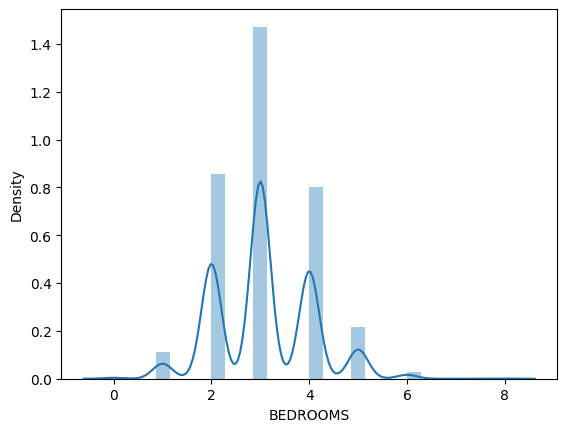

+--------+--------+
|BEDROOMS|bedrooms|
+--------+--------+
|     3.0|     3.0|
|     4.0|     4.0|
|     2.0|     2.0|
|     2.0|     2.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     2.0|     2.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
+--------+--------+
only showing top 20 rows



In [105]:
from pyspark.ml.feature import Bucketizer

# Plot distribution of sample_df
sns.distplot(sample_df, axlabel='BEDROOMS')
plt.show()

# Create the bucket splits and bucketizer
splits = [0, 1, 2, 3, 4, 5, float('Inf')]
buck = Bucketizer(splits=splits, inputCol='Bedrooms', outputCol='bedrooms')

# Apply the transformation to df: df_bucket
df_bucket = buck.transform(df)

# Display results
df_bucket[['BEDROOMS', 'bedrooms']].show()

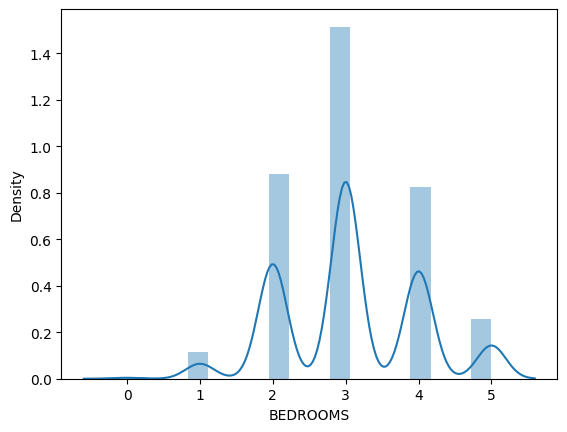

In [107]:
#Let's see the new column 
sample_df = df_bucket[['BEDROOMS']].sample(False,0.5,42).toPandas()
sns.distplot(sample_df, axlabel='BEDROOMS')
plt.show()

### One Hot Encoding
In the United States where you live determines which schools your kids can attend. Therefore it's understandable that many people care deeply about which school districts their future home will be in. While the school districts are numbered in `SCHOOLDISTRICTNUMBER` they are really categorical. Meaning that summing or averaging these values has no apparent meaning. Therefore in this example we will convert `SCHOOLDISTRICTNUMBER` from a categorial variable into a numeric vector to use in our machine learning model later.

**Instructions**

- Instantiate a `StringIndexer` transformer called `string_indexer` with `SCHOOLDISTRICTNUMBER` as the input and `School_Index` as the output.
- Apply the transformer `string_indexer` to `df` with `fit()` and `transform()`. Store the transformed dataframe in `indexed_df`.
- Create a `OneHotEncoder` transformer called `encoder` using `School_Index` as the input and `School_Vec` as the output.
- Apply the transformation to `indexed_df` using `transform()`. Inspect the iterative steps of the transformation with the supplied code.

In [110]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

# Map strings to numbers with string indexer
string_indexer = StringIndexer(inputCol='SchoolDistrictNumber', outputCol='School_Index')
indexed_df = string_indexer.fit(df).transform(df)

# Onehot encode indexed values
encoder = OneHotEncoder(inputCol='School_Index', outputCol='School_Vec')

##### As the new Spark require to fit first ####
ohe = encoder.fit(indexed_df)
######

encoded_df = ohe.transform(indexed_df)

# Inspect the transformation steps
encoded_df[['SchoolDistrictNumber', 'School_Index', 'School_Vec']].show(truncate=100)

+-----------------------------+------------+-------------+
|         SchoolDistrictNumber|School_Index|   School_Vec|
+-----------------------------+------------+-------------+
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|622 - North St Paul-Maplewood|         1.0|(7,[1],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|622 - North St Paul-Maplewood|         1.0|(7,[1],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0]

#### Importat notes after the OneHotEncoder
1. The newer version of PySpark requires to fit() before the transform() as per [this documentation](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.ml.feature.OneHotEncoder.html).
2. One Hot Encoding is a great way to handle categorial variables. You may have noticed that the implementation in PySpark is different than Pandas get_dummies() as it puts everything into a single column of type vector rather than a new column for each value. It's also different from sklearn's OneHotEncoder in that the last categorical value is captured by a vector of all zeros.

# Building a Model

## Choosing the Algorithm
1. Choosing the Algorithm

PySpark has many different machine learning algorithms to choose from. While this makes our ability to predict, classify or cluster on enormous data sets easier, the onus is on us to choose the correct one.

2. Spark ML Landscape

This flowchart can help us navigate what's available in PySpark's machine learning library for dataframes, ML.

3. Spark ML Landscape

Recall we are going to predict the price of a home. This price is a quantity, in this case of dollars and is continuous.

4. Spark ML Landscape

That takes us to the Regression archetype, which predicts continuous values.

5. Spark ML Landscape

Lastly, we can see algorithms for solving our problem can be found in the ml regression module.

6. PySpark Regression Methods

ml regression provides us with many different algorithms we could use. These first methods differ mostly in how they regularize, which means how they prevent themselves from finding overly complex solutions that are likely to overfit the data. While these methods can be powerful if used correctly, they require a lot of upfront work to ensure their assumptions are met. ml regression also contains tree-based methods which have the ability to easily handle things like missing and categorical values right out of the box. Decision Trees are easy to interpret but a lot of work needs to go in to prevent overfitting. So now we are down to two algorithms, RandomForest, and GBTRegression which differ in how they handle the error reduction.

7. PySpark Regression Methods

We will choose to evaluate both Random Forest as well as Gradient Boosted Trees, or GBTRegression.

8. Intro to Random Forest Regression

Both Random Forest and Gradient Boosted Trees models are examples of ensemble models. They combine many smaller models together to create a more powerful model. In the diagram you can see that we have many decision trees, each only trained on a sample of the data to prevent overfitting. When it comes time to predict a new value it runs through decision trees and they merge their answers together to create a prediction.

9. Test and Train Splits for Time Series

If you've had some exposure to machine learning you may have seen the crucial step of splitting your data into test and training sets, which needs to be done before applying feature transformations. Commonly data is split randomly. Ours contains a time component so splitting randomly would leak information about what happens in the future. To prevent this you can split your data sequentially and train your model on the first sequences and then test it with the last. The size of your sets depends on how far out you need to forecast. Doing incremental testing is called step-forward optimization.

10. Test and Train Splits for Time Series

Here, we'll create just one of the sequential test/train splits, with some added logic you could build out walk-forward optimization seen previously. First, we'll dynamically set our time variables, its important as when your dataset refreshes; you don't have to remember to change them! To start we'll calculate the min and max OFFMKTDATE dates. Then we can put in them in our datediff function to get the number of days our data spans. To create an 80-20 split we can multiply it by point-8 and add it to our min_date with date_add to get the date value. We can create our train and test sets by using a where function on df OFFMKTDATE to filter them. An extra where is needed on LISTDATE to ensure it contains items listed as of the split_date.

11. Time to practice!

In this video, we saw how to navigate Pyspark ML and a few considerations in the algorithm selection process. Lastly, you learned how to create test and training sets for time-series. Let's see you try!

Which MLlib Module?
PySpark MLlib has many modules and algorithms available for machine learning. Each of them solves a specific subset of problem types. Given the problem we are trying to solve, which module is the correct one?
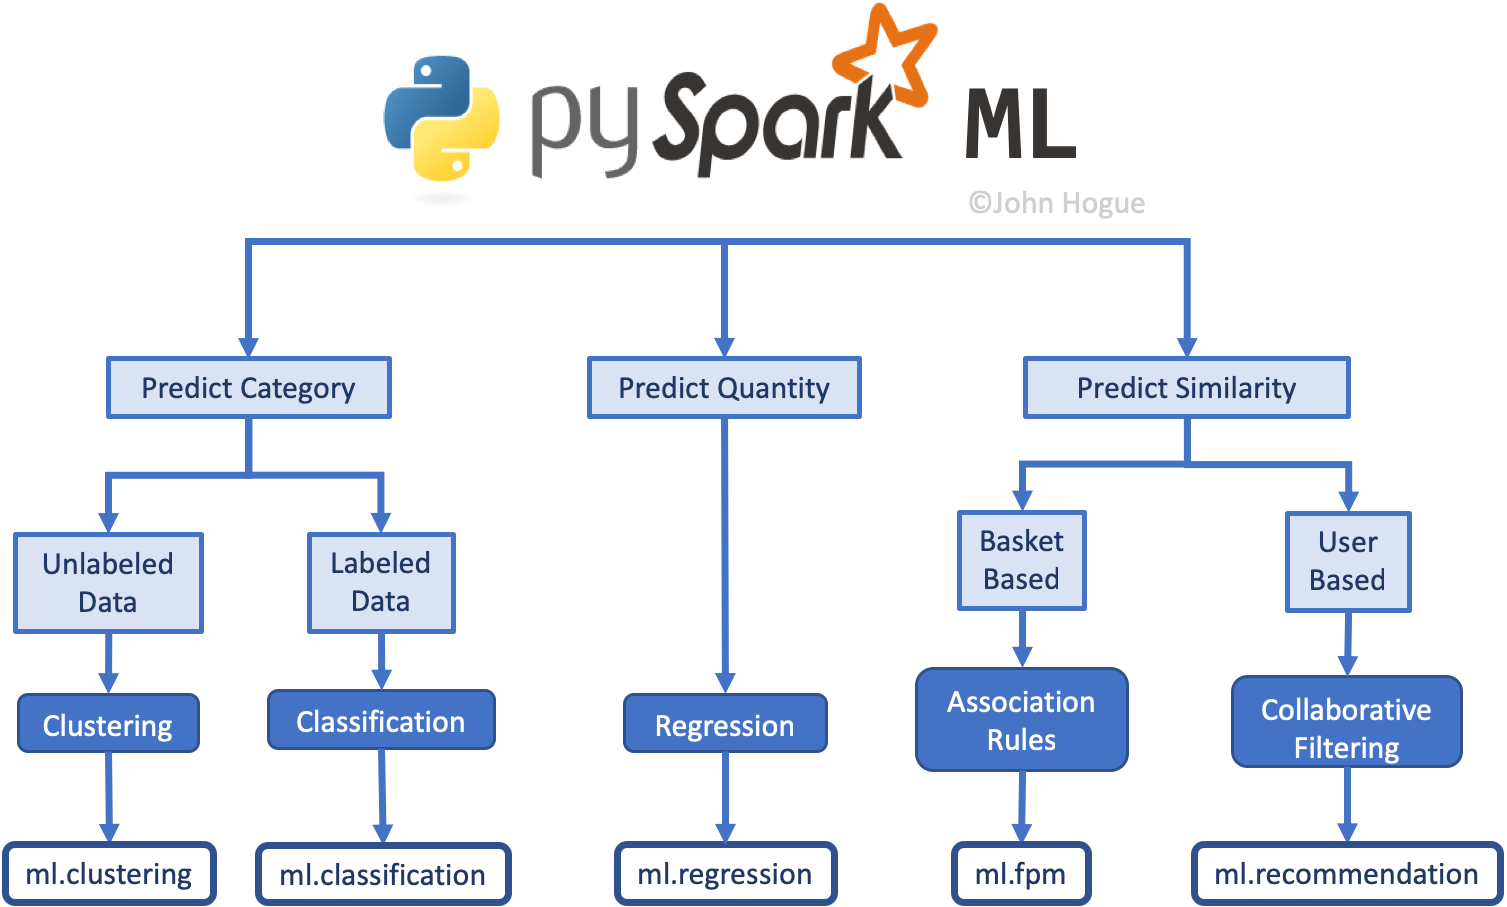

Answer the question


- We chose to go with ml.clustering

- We chose to go with ml.recommendation

- We chose to go with ml.classification

- **We chose to go with ml.regression**

### Creating Time Splits
In the video, we learned why splitting data randomly can be dangerous for time series as data from the future can cause overfitting in our model. Often with time series, you acquire new data as it is made available and you will want to retrain your model using the newest data. In the video, we showed how to do a percentage split for test and training sets but suppose you wish to train on all available data except for the last 45days which you want to use for a test set.

In this exercise, we will create a function to find the split date for using the last 45 days of data for testing and the rest for training. Please note that `timedelta()` has already been imported for you from the standard python library datetime.

**Instructions**

- Create a function `train_test_split_date()` that takes in a dataframe, `df`, the date column to use for splitting `split_col` and the number of days to use for the test set, `test_days` and set it to have a default value of 45.
- Find the `min` and `max dates for `split_col` using `,()`.
- Find the date to split the test and training sets using `max_date` and subtract `test_days` from it by using `timedelta()` which takes a days parameter, in this case, pass in `test_days`,
- Using `OFFMKTDATE` as the `split_col` find `split_date` and use it to filter the dataframe into two new ones, `train_df` and `test_df`, Where `test_df` is only the last 45 days of the data. Additionally, ensure that the `test_df` only contains homes listed as of the split date by filtering `df['LISTDATE']` less than or equal to the `split_date`.

In [122]:
from datetime import timedelta
df = df.withColumn('OFFMKTDATE', to_date(df['offmarketdate'], 'M/d/yyyy H:mm'))

In [123]:
df[['offmarketdate', 'OFFMKTDATE']].show(5)

+---------------+----------+
|  offmarketdate|OFFMKTDATE|
+---------------+----------+
| 7/30/2017 0:00|2017-07-30|
|10/13/2017 0:00|2017-10-13|
| 7/24/2017 0:00|2017-07-24|
| 9/13/2017 0:00|2017-09-13|
| 10/3/2017 0:00|2017-10-03|
+---------------+----------+
only showing top 5 rows



In [124]:
def train_test_split_date(df, split_col, test_days=45):
    """Calculate the date to split test and training sets"""
    # Find how many days our data spans
    max_date = df.agg({split_col: 'max'}).collect()[0][0]
    min_date = df.agg({split_col: 'min'}).collect()[0][0]
    # Subtract an integer number of days from the last date in dataset
    split_date = max_date - timedelta(days=test_days)
    return split_date

# Find the date to use in spitting test and train
split_date = train_test_split_date(df, 'OFFMKTDATE')

# Create Sequential Test and Training Sets
train_df = df.where(df['OFFMKTDATE'] < split_date) 
test_df = df.where(df['OFFMKTDATE'] >= split_date).where(df['LISTDATE'] <= split_date) 

In [125]:
split_date

datetime.date(2017, 12, 10)

### Adjusting Time Features
We have mentioned throughout this course some of the dangers of leaking information to your model during training. Data leakage will cause your model to have very optimistic metrics for accuracy but once real data is run through it the results are often very disappointing.

In this exercise, we are going to ensure that `DAYSONMARKET` only reflects what information we have at the time of predicting the value. I.e., if the house is still on the market, we don't know how many more days it will stay on the market. We need to adjust our `test_df` to reflect what information we currently have as of `2017-12-10`.

NOTE: This example will use the `lit()` function. This function is used to allow single values where an entire column is expected in a function call.

**Instructions**

- Import the following functions from `pyspark.sql.functions` to use later on: `datediff()`, `to_date()`, `lit()`.
- Convert the date string `'2017-12-10'` to a pyspark date by first calling the literal function, `lit()` on it and then `to_date()`
- Create `test_df` by filtering `OFFMKTDATE` greater than or equal to the `split_date` and `LISTDATE` less than or equal to the `split_date` using `where()`.
- Replace `DAYSONMARKET` by calculating a new column called `DAYSONMARKET`, the new column should be the difference between `split_date` and `LISTDATE` use `datediff()` to perform the date calculation. Inspect the new column and the original using the code provided.

In [127]:
df = df.withColumn('DAYSONMARKET_Original', df['DAYSONMARKET'])

In [128]:
df = df.withColumn('LISTDATE', to_date(df['LISTDATE'], 'M/d/yyyy H:mm'))
df[['LISTDATE']].show(5)

+----------+
|  LISTDATE|
+----------+
|2017-07-15|
|2017-10-09|
|2017-06-26|
|2017-08-25|
|2017-09-12|
+----------+
only showing top 5 rows



In [129]:
df = df.withColumn('OFFMKTDATE', to_date(df['OFFMKTDATE'], 'M/d/yyyy H:mm'))
df[['OFFMKTDATE']].show(5)

+----------+
|OFFMKTDATE|
+----------+
|2017-07-30|
|2017-10-13|
|2017-07-24|
|2017-09-13|
|2017-10-03|
+----------+
only showing top 5 rows



In [130]:
from pyspark.sql.functions import datediff, to_date, lit

split_date = to_date(lit('2017-12-10'))
# Create Sequential Test set
test_df = df.where(df['OFFMKTDATE'] >= split_date).where(df['LISTDATE'] <= split_date)

# Create a copy of DAYSONMARKET to review later
test_df = test_df.withColumn('DAYSONMARKET_Original', test_df['DAYSONMARKET'])

# Recalculate DAYSONMARKET from what we know on our split date
test_df = test_df.withColumn('DAYSONMARKET', datediff(split_date, 'LISTDATE'))

# Review the difference
test_df[['LISTDATE', 'OFFMKTDATE', 'DAYSONMARKET_Original', 'DAYSONMARKET']].show()

+----------+----------+---------------------+------------+
|  LISTDATE|OFFMKTDATE|DAYSONMARKET_Original|DAYSONMARKET|
+----------+----------+---------------------+------------+
|2017-10-06|2018-01-24|                  110|          65|
|2017-09-18|2017-12-12|                   82|          83|
|2017-11-07|2017-12-12|                   35|          33|
|2017-10-30|2017-12-11|                   42|          41|
|2017-07-14|2017-12-19|                  158|         149|
|2017-10-25|2017-12-20|                   45|          46|
|2017-12-07|2017-12-23|                   16|           3|
|2017-11-22|2017-12-16|                   24|          18|
|2017-10-27|2017-12-13|                   47|          44|
|2017-09-29|2017-12-12|                   12|          72|
|2017-11-28|2017-12-11|                   13|          12|
|2017-09-09|2018-01-17|                  119|          92|
|2017-11-18|2017-12-15|                   26|          22|
|2017-12-07|2017-12-18|                   11|           

## Feature Engineering Assumptions for RFR
1. Preparing for Random Forest Regression

Each machine learning algorithm has its own assumptions you need take into account for it to work appropriately. In this video, we will cover what the assumptions are for Random Forest Regression, what features we have in our final dataset and lastly how to get them ready for building a model.

2. Assumptions Needed for Features

The lack of assumptions needed for Random Forest Regression make it and its related methods some of the most popular choices for predicting continuous values! For example, Random Forests are able to work with non-normally distributed data or data that is unscaled. Missing and categorical data can be handled very easily with value replacements.

3. Appended Features

Adding in external datasets is one of my personal favorite parts of modeling. It's where I find that you can often make huge improvements in your model relatively easily. Here are a few that I added. 30 year Mortgage Rate to see how much people are willing to pay depending on their rate. City data to see how unique a house is in the area or if it is exceptionally cheap or expensive. Transportation metrics can help us understand how much people are willing to pay for a convenient location. Lastly, I included bank holidays to see if that impacted how or when houses were sold. By all means, this is not an exhaustive list of datasets to include but just some I chose!

4. Engineered Features

Even though we were able to avoid a lot of the onerous preprocessing steps by using Random Forest Regression there is still plenty of work to do with engineering features. Time components like the month or the week that a holiday falls on are needed help attribute seasonal effects. Valuable but often the hardest to create features are rates, ratios and other generated features that need either business or personal context to create. Lastly, choosing whether or not to expand compound fields is ultimately a judgment call and may be something to consider in the second iteration of modeling. Since PySpark DataFrames don't have a shape attribute we'll have to print our own to inspect the final set of information!

5. Dataframe Columns to Feature Vectors

Pyspark ML algorithms require all of the features to be provided in a single column of type vector. We will need to convert our columns for Random Forest Regression to work. To do this we need to import the VectorAssembler transformer to use it later. Sadly, while Random Forest Regression can handle missing values, vectors cannot. Due to the nature of how tree-based machine learning partitions data, we can just assign missings a value that is outside the existing range of the variable to replace nulls with. But first, we need to know which columns to convert. We can take the list of column names and remove our dependent variable so the vector contains only features.

6. Dataframe Columns to Feature Vectors

To create a VectorAssembler we need to supply it with our list of columns and a name for output. Applying the transformation is done via the transform method. Lastly, we need to create a new dataframe with just the columns that matter: SALESCLOSEPRICE and features.

7. We are now ready for machine learning!

Finally, we are ready for machine learning; our features have been created and prepared for the algorithm we are running. Now it's your turn to convert the columns to vectors and get ready for applying Random Forest Regression!

### Feature Engineering For Random Forests
Considering what steps you'll need to take to preprocess your data before running a machine learning algorithm is important or you could get invalid results. Which of the following preprocessing techniques are needed for Random Forest Regression?

Answer the question

- **Perform value replacement for missing values and encode categorical text features to numeric.**

- Scale all features between 0 and 1 with a min max scaler.


- Ensure all variables are standard normal distributed, mean 0 and standard deviation of 1.

- None of the above.

### Dropping Columns with Low Observations
After doing a lot of feature engineering it's a good idea to take a step back and look at what you've created. If you've used some automation techniques on your categorical features like exploding or OneHot Encoding you may find that you now have hundreds of new binary features. While the subject of feature selection is material for a whole other course but there are some quick steps you can take to reduce the dimensionality of your data set.

In this exercise, we are going to remove columns that have less than 30 observations. **30 is a common minimum number of observations for statistical significance**. Any less than that and the relationships cause overfitting because of a sheer coincidence!

NOTE: The data is available in the dataframe, `df`.

**Instructions**

- Using the provided for loop that iterates through the list of binary columns, calculate the sum of the values in the column using the agg function. Use `collect()` to run the calculation immediately and save the results to `obs_count`.
- Compare `obs_count` to `obs_threshold`, the if statement should be true if `obs_count` is less than or equal to `obs_threshold`.
- Remove columns that have been appended to `cols_to_remove` list by using `drop()`. Recall that the `*` allows the list to be unpacked.
- Print the starting and ending shape of the PySpark dataframes by using `count()` for number of records and `len()` on `df.columns` or `new_df.columns` to find the number of columns.

In [138]:
df.dtypes

[('No', 'int'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'int'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'int'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'int'),
 ('LISTDATE', 'date'),
 ('LISTPRICE', 'int'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'int'),
 ('PricePerTSFT', 'double'),
 ('FOUNDATIONSIZE', 'int'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'int'),
 ('offmarketdate', 'string'),
 ('Fireplaces', 'int'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PDOM', 'int'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'int'),
 ('Taxes', 'int'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'int'),
 ('LivingArea', 'int'),
 ('YEARBUILT', 'int'),
 ('ZONING', 'strin

In [139]:
#binary_cols = ['FENCE_WIRE', 'FENCE_ELECTRIC', 'FENCE_NAN', 'FENCE_PARTIAL', 'FENCE_RAIL', 'FENCE_OTHER', 'FENCE_CHAIN LINK', 'FENCE_FULL', 'FENCE_NONE', 'FENCE_PRIVACY', 'FENCE_WOOD', 'FENCE_INVISIBLE', 'ROOF_ASPHALT SHINGLES', 'ROOF_SHAKES', 'ROOF_NAN', 'ROOF_UNSPECIFIED SHINGLE', 'ROOF_SLATE', 'ROOF_PITCHED', 'ROOF_FLAT', 'ROOF_TAR/GRAVEL', 'ROOF_OTHER', 'ROOF_METAL', 'ROOF_TILE', 'ROOF_RUBBER', 'ROOF_WOOD SHINGLES', 'ROOF_AGE OVER 8 YEARS', 'ROOF_AGE 8 YEARS OR LESS', 'POOLDESCRIPTION_NAN', 'POOLDESCRIPTION_HEATED', 'POOLDESCRIPTION_NONE', 'POOLDESCRIPTION_SHARED', 'POOLDESCRIPTION_INDOOR', 'POOLDESCRIPTION_OUTDOOR', 'POOLDESCRIPTION_ABOVE GROUND', 'POOLDESCRIPTION_BELOW GROUND', 'GARAGEDESCRIPTION_ASSIGNED', 'GARAGEDESCRIPTION_TANDEM', 'GARAGEDESCRIPTION_UNCOVERED/OPEN', 'GARAGEDESCRIPTION_TUCKUNDER', 'GARAGEDESCRIPTION_DRIVEWAY - ASPHALT', 'GARAGEDESCRIPTION_HEATED GARAGE', 'GARAGEDESCRIPTION_UNDERGROUND GARAGE', 'GARAGEDESCRIPTION_DRIVEWAY - SHARED', 'GARAGEDESCRIPTION_CONTRACT PKG REQUIRED', 'GARAGEDESCRIPTION_GARAGE DOOR OPENER', 'GARAGEDESCRIPTION_MORE PARKING OFFSITE FOR FEE', 'GARAGEDESCRIPTION_VALET PARKING FOR FEE', 'GARAGEDESCRIPTION_OTHER', 'GARAGEDESCRIPTION_MORE PARKING ONSITE FOR FEE', 'GARAGEDESCRIPTION_DRIVEWAY - OTHER SURFACE', 'GARAGEDESCRIPTION_DETACHED GARAGE', 'GARAGEDESCRIPTION_SECURED', 'GARAGEDESCRIPTION_CARPORT', 'GARAGEDESCRIPTION_DRIVEWAY - CONCRETE', 'GARAGEDESCRIPTION_ON-STREET PARKING ONLY', 'GARAGEDESCRIPTION_COVERED', 'GARAGEDESCRIPTION_INSULATED GARAGE', 'GARAGEDESCRIPTION_UNASSIGNED', 'GARAGEDESCRIPTION_NONE', 'GARAGEDESCRIPTION_DRIVEWAY - GRAVEL', 'GARAGEDESCRIPTION_NO INT ACCESS TO DWELLING', 'GARAGEDESCRIPTION_UNITS VARY', 'GARAGEDESCRIPTION_ATTACHED GARAGE', 'APPLIANCES_NAN', 'APPLIANCES_COOKTOP', 'APPLIANCES_WALL OVEN', 'APPLIANCES_WATER SOFTENER - OWNED', 'APPLIANCES_DISPOSAL', 'APPLIANCES_DISHWASHER', 'APPLIANCES_OTHER', 'APPLIANCES_INDOOR GRILL', 'APPLIANCES_WASHER', 'APPLIANCES_RANGE', 'APPLIANCES_REFRIGERATOR', 'APPLIANCES_FURNACE HUMIDIFIER', 'APPLIANCES_TANKLESS WATER  HEATER', 'APPLIANCES_ELECTRONIC AIR FILTER', 'APPLIANCES_MICROWAVE', 'APPLIANCES_EXHAUST FAN/HOOD', 'APPLIANCES_NONE', 'APPLIANCES_CENTRAL VACUUM', 'APPLIANCES_TRASH COMPACTOR', 'APPLIANCES_AIR-TO-AIR EXCHANGER', 'APPLIANCES_DRYER', 'APPLIANCES_FREEZER', 'APPLIANCES_WATER SOFTENER - RENTED', 'EXTERIOR_SHAKES', 'EXTERIOR_CEMENT BOARD', 'EXTERIOR_BLOCK', 'EXTERIOR_VINYL', 'EXTERIOR_FIBER BOARD', 'EXTERIOR_OTHER', 'EXTERIOR_METAL', 'EXTERIOR_BRICK/STONE', 'EXTERIOR_STUCCO', 'EXTERIOR_ENGINEERED WOOD', 'EXTERIOR_WOOD', 'DININGROOMDESCRIPTION_EAT IN KITCHEN', 'DININGROOMDESCRIPTION_NAN', 'DININGROOMDESCRIPTION_OTHER', 'DININGROOMDESCRIPTION_LIVING/DINING ROOM', 'DININGROOMDESCRIPTION_SEPARATE/FORMAL DINING ROOM', 'DININGROOMDESCRIPTION_KITCHEN/DINING ROOM', 'DININGROOMDESCRIPTION_INFORMAL DINING ROOM', 'DININGROOMDESCRIPTION_BREAKFAST AREA', 'BASEMENT_FINISHED (LIVABLE)', 'BASEMENT_PARTIAL', 'BASEMENT_SUMP PUMP', 'BASEMENT_INSULATING CONCRETE FORMS', 'BASEMENT_CRAWL SPACE', 'BASEMENT_PARTIAL FINISHED', 'BASEMENT_CONCRETE BLOCK', 'BASEMENT_DRAINAGE SYSTEM', 'BASEMENT_POURED CONCRETE', 'BASEMENT_UNFINISHED', 'BASEMENT_DRAIN TILED', 'BASEMENT_WOOD', 'BASEMENT_FULL', 'BASEMENT_EGRESS WINDOWS', 'BASEMENT_DAY/LOOKOUT WINDOWS', 'BASEMENT_SLAB', 'BASEMENT_STONE', 'BASEMENT_NONE', 'BASEMENT_WALKOUT', 'BATHDESC_MAIN FLOOR 1/2 BATH', 'BATHDESC_TWO MASTER BATHS', 'BATHDESC_MASTER WALK-THRU', 'BATHDESC_WHIRLPOOL', 'BATHDESC_NAN', 'BATHDESC_3/4 BASEMENT', 'BATHDESC_TWO BASEMENT BATHS', 'BATHDESC_OTHER', 'BATHDESC_3/4 MASTER', 'BATHDESC_MAIN FLOOR 3/4 BATH', 'BATHDESC_FULL MASTER', 'BATHDESC_MAIN FLOOR FULL BATH', 'BATHDESC_WALK-IN SHOWER', 'BATHDESC_SEPARATE TUB & SHOWER', 'BATHDESC_FULL BASEMENT', 'BATHDESC_BASEMENT', 'BATHDESC_WALK THRU', 'BATHDESC_BATHROOM ENSUITE', 'BATHDESC_PRIVATE MASTER', 'BATHDESC_JACK & JILL 3/4', 'BATHDESC_UPPER LEVEL 1/2 BATH', 'BATHDESC_ROUGH IN', 'BATHDESC_UPPER LEVEL FULL BATH', 'BATHDESC_1/2 MASTER', 'BATHDESC_1/2 BASEMENT', 'BATHDESC_JACK AND JILL', 'BATHDESC_UPPER LEVEL 3/4 BATH', 'ZONING_INDUSTRIAL', 'ZONING_BUSINESS/COMMERCIAL', 'ZONING_OTHER', 'ZONING_RESIDENTIAL-SINGLE', 'ZONING_RESIDENTIAL-MULTI-FAMILY', 'COOLINGDESCRIPTION_WINDOW', 'COOLINGDESCRIPTION_WALL', 'COOLINGDESCRIPTION_DUCTLESS MINI-SPLIT', 'COOLINGDESCRIPTION_NONE', 'COOLINGDESCRIPTION_GEOTHERMAL', 'COOLINGDESCRIPTION_CENTRAL', 'CITY:LELM - LAKE ELMO', 'CITY:MAPW - MAPLEWOOD', 'CITY:OAKD - OAKDALE', 'CITY:STP - SAINT PAUL', 'CITY:WB - WOODBURY', 'LISTTYPE:EXCLUSIVE AGENCY', 'LISTTYPE:EXCLUSIVE RIGHT', 'LISTTYPE:EXCLUSIVE RIGHT WITH EXCLUSIONS', 'LISTTYPE:OTHER', 'LISTTYPE:SERVICE AGREEMENT', 'SCHOOLDISTRICTNUMBER:6 - SOUTH ST. PAUL', 'SCHOOLDISTRICTNUMBER:622 - NORTH ST PAUL-MAPLEWOOD', 'SCHOOLDISTRICTNUMBER:623 - ROSEVILLE', 'SCHOOLDISTRICTNUMBER:624 - WHITE BEAR LAKE', 'SCHOOLDISTRICTNUMBER:625 - ST. PAUL', 'SCHOOLDISTRICTNUMBER:832 - MAHTOMEDI', 'SCHOOLDISTRICTNUMBER:833 - SOUTH WASHINGTON COUNTY', 'SCHOOLDISTRICTNUMBER:834 - STILLWATER', 'POTENTIALSHORTSALE:NO', 'POTENTIALSHORTSALE:NOT DISCLOSED', 'STYLE:(CC) CONVERTED MANSION', 'STYLE:(CC) HIGH RISE (4+ LEVELS)', 'STYLE:(CC) LOW RISE (3- LEVELS)', 'STYLE:(CC) MANOR/VILLAGE', 'STYLE:(CC) TWO UNIT', 'STYLE:(SF) FOUR OR MORE LEVEL SPLIT', 'STYLE:(SF) MODIFIED TWO STORY', 'STYLE:(SF) MORE THAN TWO STORIES', 'STYLE:(SF) ONE 1/2 STORIES', 'STYLE:(SF) ONE STORY', 'STYLE:(SF) OTHER', 'STYLE:(SF) SPLIT ENTRY (BI-LEVEL)', 'STYLE:(SF) THREE LEVEL SPLIT', 'STYLE:(SF) TWO STORIES', 'STYLE:(TH) DETACHED', 'STYLE:(TH) QUAD/4 CORNERS', 'STYLE:(TH) SIDE X SIDE', 'STYLE:(TW) TWIN HOME', 'ASSUMABLEMORTGAGE:INFORMATION COMING', 'ASSUMABLEMORTGAGE:NOT ASSUMABLE', 'ASSUMABLEMORTGAGE:YES W/ QUALIFYING', 'ASSUMABLEMORTGAGE:YES W/NO QUALIFYING', 'ASSESSMENTPENDING:NO', 'ASSESSMENTPENDING:UNKNOWN', 'ASSESSMENTPENDING:YES']
# As the binary columns were created in different DFs
binary_cols = df.columns

In [143]:
obs_threshold = 30
cols_to_remove = list()
# Inspect first 10 binary columns in list
for col in binary_cols[0:10]:
    # Count the number of 1 values in the binary column
    # Count instead of sum 
    obs_count = df.agg({col: 'count'}).collect()[0][0]
    #Try to avoid errors with fully null vals
    try:
    # If less than our observation threshold, remove
        if obs_count <= obs_threshold:
            cols_to_remove.append(col)
    except:
        continue
    
# Drop columns and print starting and ending dataframe shapes
new_df = df.drop(*cols_to_remove)

print('Rows: ' + str(df.count()) + ' Columns: ' + str(len(df.columns)))
print('Rows: ' + str(new_df.count()) + ' Columns: ' + str(len(new_df.columns)))

Rows: 4968 Columns: 89
Rows: 4968 Columns: 89


## Naively Handling Missing and Categorical Values
Random Forest Regression is robust enough to allow us to ignore many of the more time consuming and tedious data preparation steps. While some implementations of Random Forest handle missing and categorical values automatically, PySpark's does not. The math remains the same however so we can get away with some naive value replacements.

For missing values since our data is strictly positive, we will assign -1. The random forest will split on this value and handle it differently than the rest of the values in the same feature.

For categorical values, we can just map the text values to numbers and again the random forest will appropriately handle them by splitting on them. In this example, we will dust off pipelines from Introduction to PySpark to write our code more concisely. Please note that the exercise will start by displaying the dtypes of the columns in the dataframe, compare them to the results at the end of this exercise.

NOTE: `Pipeline` and `StringIndexer` are already imported for you. The list `categorical_cols` is also available.

**Instructions**

- Replace the values in `WALKSCORE` and `BIKESCORE` with `-1` using `fillna()` and the subset parameter.
- Create a list of `StringIndexers` by using list comprehension to iterate over each column in `categorical_cols`.
- Apply `fit()` and `transform()` to the pipeline `indexer_pipeline`.
- Drop the `categorical_cols` using `drop()` since they are no longer needed. Inspect the result data types using `dtypes`.

In [144]:
categorical_cols = df.columns

In [151]:
df.dtypes

[('No', 'int'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'int'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'int'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'int'),
 ('LISTDATE', 'date'),
 ('LISTPRICE', 'int'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'int'),
 ('PricePerTSFT', 'double'),
 ('FOUNDATIONSIZE', 'int'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'int'),
 ('offmarketdate', 'string'),
 ('Fireplaces', 'int'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PDOM', 'int'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'int'),
 ('Taxes', 'int'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'int'),
 ('LivingArea', 'int'),
 ('YEARBUILT', 'int'),
 ('ZONING', 'strin

In [153]:
categorical_cols = []
for col in df.dtypes:
    if col[1] == 'string':
        categorical_cols.append(col[0])
categorical_cols

['MLSID',
 'streetaddress',
 'STREETNAME',
 'StateOrProvince',
 'City',
 'LISTTYPE',
 'FENCE',
 'MapLetter',
 'LotSizeDimensions',
 'SchoolDistrictNumber',
 'offmarketdate',
 'RoomArea4',
 'roomtype',
 'ROOF',
 'RoomFloor4',
 'PotentialShortSale',
 'GarageDescription',
 'RoomFloor1',
 'RoomArea1',
 'ZONING',
 'STYLE',
 'CoolingDescription',
 'APPLIANCES',
 'ROOMFAMILYCHAR',
 'RoomArea3',
 'EXTERIOR',
 'RoomFloor3',
 'RoomFloor2',
 'RoomArea2',
 'DiningRoomDescription',
 'BASEMENT',
 'Class',
 'BATHDESC',
 'RoomArea5',
 'RoomFloor5',
 'RoomArea6',
 'RoomFloor6',
 'RoomArea7',
 'RoomFloor7',
 'ASSESSMENTPENDING']

In [154]:
from pyspark.ml import Pipeline

In [155]:
# Replace missing values
df = df.fillna(-1, subset=categorical_cols)

# Create list of StringIndexers using list comprehension
indexers = [StringIndexer(inputCol=input_column, outputCol=input_column+"_IDX")\
            .setHandleInvalid("keep") for input_column in categorical_cols]
# Create pipeline of indexers
indexer_pipeline = Pipeline(stages=indexers)
# Fit and Transform the pipeline to the original data
df_indexed = indexer_pipeline.fit(df).transform(df)

# Clean up redundant columns
df_indexed = df_indexed.drop(*categorical_cols)
# Inspect data transformations
print(df_indexed.dtypes)

[('No', 'int'), ('StreetNumberNumeric', 'int'), ('PostalCode', 'int'), ('SalesClosePrice', 'int'), ('LISTDATE', 'date'), ('LISTPRICE', 'int'), ('OriginalListPrice', 'int'), ('PricePerTSFT', 'double'), ('FOUNDATIONSIZE', 'int'), ('DAYSONMARKET', 'int'), ('Fireplaces', 'int'), ('PDOM', 'int'), ('SQFTABOVEGROUND', 'int'), ('Taxes', 'int'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'int'), ('LivingArea', 'int'), ('YEARBUILT', 'int'), ('ACRES', 'double'), ('BathsFull', 'int'), ('BathsHalf', 'int'), ('BATHQUARTER', 'int'), ('BATHSTHREEQUARTER', 'double'), ('BATHSTOTAL', 'int'), ('Bedrooms', 'int'), ('SQFTBELOWGROUND', 'int'), ('AssociationFee', 'int'), ('AssessedValuation', 'double'), ('log_SalesClosePrice', 'double'), ('percentage_scaled_days', 'double'), ('scaled_FOUNDATIONSIZE', 'double'), ('scaled_DAYSONMARKET', 'double'), ('scaled_FIREPLACES', 'double'), ('Reflect_YearBuilt', 'int'), ('adj_yearbuilt', 'double'), ('LOT_SIZE_SQFT', 'double'), ('YARD_SIZE', 'double'), ('ASSESSED_TO_LIS

## Building a Model

1. Building a Model

We've covered all the necessary steps to prepare ourselves for modeling. In this video we will cover training, predicting and evaluating a random forest regression model.

2. RandomForestRegressor

The Pyspark RandomForestRegressor method has a TON of optional parameters and a few hyperparameters used for tuning. To have a minimally viable model you will only need to set a handful. First up is featuresCol which tells the model which column is the vector we created with VectorAssembler that now represents all of our feature data. Since we named the column 'features' we will use that to set featuresCol. Next up is labelCol which sets the dependent variable for the model, ours is named SALESCLOSEPRICE. Then we need to name our output column by setting predictionCol. I find it helpful to be explicit rather than leaving it the default value so have named it Prediction_Price. Last of the basic parameters is seed which by setting this to a value we can ensure that subsequent runs return the same model, without it, the random forest would be slightly different! I've set mine to 42 for good luck, but the specific number isn't important.

3. Training a Random Forest

Enough talking, let's build our model! To start we need to import the Random Forest Regressor from PySpark's ML module. Once that's done we can initialize RandomForestRegressor with the appropriate columns to use for training and predicting, again setting the seed is crucial to repeatability. Lastly, we create a variable to hold our trained model, uninspiredly called model and train the RandomForestRegressor, rf by calling fit with our training dataframe, train_df. Congratulations you've created a model! Wait you want to predict new values with it?

4. Predicting with a Model

Predicting house prices with the model we just trained is straightforward. To do so we need to call transform with the data withheld from training, the test set test_df. If you had new listings of homes and wanted to predict their prices you'd merely have to preprocess it in the same manner as test_df before using the model to predict prices. Given that test_df has the actual home sale prices we can inspect them side by side by using select to grab only the columns we care about and displaying them with show.

5. Evaluating a Model

Predicting values is great, but if we don't know how good we are at it then what's the point? To evaluate the model we need import RegressionEvaluator which allows us to calculate various metrics to gauge model performance. To initialize it we need to provide the actual values, in this case, SALESCLOSEPRICE and the predicted values which we named Prediction_Price when we created the model. Once we have the instance of evaluator created we can call it with our predictions dataframe and a dictionary of the metric type we want it to evaluate with. Which metric you wish to optimize an important decision to make. We can see that our model's RMSE returns a value in the thousands while our R-squared is less than 1. R-squared easy to interpret regardless of what you are predicting, if it's 0, you are no better than random chance, if it's 1 you are predicting perfectly. On the other hand, RMSE provides an absolute number of unexplained variance in our model, it's even in the same units as our prediction, US dollars. So even though R-squared is really high, RMSE indicates that we have $22,000 of variance unexplained on average!

6. Let's model some data!

This video showed little code is needed to train, predict and evaluate a model with Pyspark. Now it's your turn to build some models on your own!

### Building a Regression Model
One of the great things about PySpark ML module is that most algorithms can be tried and tested without changing much code. Random Forest Regression is a fairly simple ensemble model, using bagging to fit. Another tree based ensemble model is Gradient Boosted Trees which uses a different approach called boosting to fit. In this exercise let's train a `GBTRegressor`.

**Instructions**

- Import `GBTRegressor` from `pyspark.ml.regression` which you will notice is the same module as `RandomForestRegressor`.
- Instantiate `GBTRegressor` with `featuresCol` set to the vector column of our features named, `features`, `labelCol` set to our dependent variable, `SALESCLOSEPRICE` and the random seed to `42`
- Train the model by calling `fit()` on `gbt` with the imported training data, `train_df`.

In [157]:
df.dtypes

[('No', 'int'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'int'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'int'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'int'),
 ('LISTDATE', 'date'),
 ('LISTPRICE', 'int'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'int'),
 ('PricePerTSFT', 'double'),
 ('FOUNDATIONSIZE', 'int'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'int'),
 ('offmarketdate', 'string'),
 ('Fireplaces', 'int'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PDOM', 'int'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'int'),
 ('Taxes', 'int'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'int'),
 ('LivingArea', 'int'),
 ('YEARBUILT', 'int'),
 ('ZONING', 'strin

In [160]:
'''
from pyspark.ml.regression import GBTRegressor

# Train a Gradient Boosted Trees (GBT) model.
gbt = GBTRegressor(featuresCol='features',
                           labelCol='SALESCLOSEPRICE',
                           predictionCol="Prediction_Price",
                           seed=42
                           )

# Train model.
model = gbt.fit(train_df)
'''

'\nfrom pyspark.ml.regression import GBTRegressor\n\n# Train a Gradient Boosted Trees (GBT) model.\n# will use garage_list instead of featuresCol\n#gbt = GBTRegressor(featuresCol=\'featuresCol\',\ngbt = GBTRegressor(featuresCol=\'features\',\n                           labelCol=\'SALESCLOSEPRICE\',\n                           predictionCol="Prediction_Price",\n                           seed=42\n                           )\n\n# Train model.\nmodel = gbt.fit(train_df)\n'

### Evaluating & Comparing Algorithms
Now that we've created a new model with `GBTRegressor` its time to compare it against our baseline of `RandomForestRegressor`. To do this we will compare the predictions of both models to the actual data and calculate `RMSE` and $R^2$.

**Instructions**

- Import `RegressionEvaluator` from `pyspark.ml.evaluation` so it is available for use later.
- Initialize `RegressionEvaluator` by setting `labelCol` to our actual data, `SALESCLOSEPRICE` and `predictionCol` to our predicted data, `Prediction_Price`
- To calculate our metrics, call evaluate on evaluator with the prediction values preds and create a dictionary with key `evaluator.metricName` and value of `rmse`, do the same for the `r2` metric.

In [161]:
'''
from pyspark.ml.evaluation import RegressionEvaluator

# Select columns to compute test error
evaluator = RegressionEvaluator(labelCol='SALESCLOSEPRICE', 
                                predictionCol='Prediction_Price')
# Dictionary of model predictions to loop over
models = {'Gradient Boosted Trees': gbt_predictions, 'Random Forest Regression': rfr_predictions}
for key, preds in models.items():
  # Create evaluation metrics
  rmse = evaluator.evaluate(preds, {evaluator.metricName: 'rmse'})
  r2 = evaluator.evaluate(preds, {evaluator.metricName: 'r2'})
  
  # Print Model Metrics
  print(key + ' RMSE: ' + str(rmse))
  print(key + ' R^2: ' + str(r2))
'''

"\nfrom pyspark.ml.evaluation import RegressionEvaluator\n\n# Select columns to compute test error\nevaluator = RegressionEvaluator(labelCol='SALESCLOSEPRICE', \n                                predictionCol='Prediction_Price')\n# Dictionary of model predictions to loop over\nmodels = {'Gradient Boosted Trees': gbt_predictions, 'Random Forest Regression': rfr_predictions}\nfor key, preds in models.items():\n  # Create evaluation metrics\n  rmse = evaluator.evaluate(preds, {evaluator.metricName: 'rmse'})\n  r2 = evaluator.evaluate(preds, {evaluator.metricName: 'r2'})\n  \n  # Print Model Metrics\n  print(key + ' RMSE: ' + str(rmse))\n  print(key + ' R^2: ' + str(r2))\n"

### Understanding Metrics
Recall that $R^2$ and `RMSE` are both metrics to evaluate the performance of regression models. Both provide a different way to interpret the fit of our model. Which of the following statements is **FALSE** regarding $R^2$ or `RMSE`?

Answer the question

- RMSE is comparable across predictions looking at the same dependent variable.

- $R^2$ **is valued between 0 and 100**

- $R^2$ is comparable across predictions regardless of dependent variable.

- RMSE is a measure of unexplained variance in the dependent variable.

## Interpreting, Saving & Loading

1. Interpreting, Saving & Loading Models

In this video, we will go over how to interpret the model and then how to save and load it for later use!

2. Interpreting a Model

Now that we've evaluated our model we will want to understand what features are important in predicting a homes' selling price. To do this we need to import pandas library to manipulate this tiny array easier. To use Spark on this would be using a sledge hammer for a delicate task. We will create a dataframe fi_df to hold our feature importances. These feature importances can be accessed by calling featureImportances on the model and converting them to an array with toArray. Since this is just an array of numbers, we will need to name the new column in the dataframe importance. Now we just have a single column dataframe. We want to create another column using the list of feature names we fed into the VectorAssembler earlier. We can convert this list into a series by wrapping it with pd Series. Next we since we have over a hundred features we only want to look at the most important ones so we will use pandas sort_values to sort the column importance in descending order.

3. Interpreting a Model

Now it's as simple as out displaying the results to the screen. Here we can see the biggest predictor of how much your house will sell for is how much you listed it for. Intuitively this makes a lot of sense, realtors are skilled in setting the value of the house and it has the effect of anchoring the price, meaning it will likely only marginally increase or decrease from that value.

4. Saving & Loading Models

Last but not least it important to know how to save and load the model. Luckily this is very simple now, to save it just call save on your model and give the model a name. Note that the model isn't a single file but a directory containing many files defining your model. To load your data you need to import RandomForestRegressionModel from pyspark ml regression and provide it the location and name of your model.

5. On to your last set of exercises!

In this video we learned how to interpret result and save and load your model for later use. Let's see you give it a try!

### Interpreting Results
It is almost always important to know which features are influencing your prediction the most. Perhaps its counterintuitive and that's an insight? Perhaps a hand full of features account for most of the accuracy of your model and you don't need to perform time acquiring or massaging other features.

In this example we will be looking at a model that has been trained without any `LISTPRICE` information. With that gone, what influences the price the most?

NOTE: The array of feature importances, importances has already been created for you from `model.featureImportances.toArray()`

**Instructions**

- Create a pandas dataframe using the values of importances and name the column importance by setting the parameter columns.
- Using the imported list of features names, `feature_cols`, create a new `pandas.Series` by wrapping it in the `pd.Series()` function. Set it to the column `fi_df['feature']`.
- Sort the dataframe using `sort_values()`, setting the by parameter to our importance column and sort it descending by setting `ascending` to `False`. Inspect the results.

In [162]:
'''
# Convert feature importances to a pandas column
fi_df = pd.DataFrame(importances, columns=['importance'])

# Convert list of feature names to pandas column
fi_df['feature'] = pd.Series(feature_cols)

# Sort the data based on feature importance
fi_df.sort_values(by=['importance'], ascending=False, inplace=True)

# Inspect Results
fi_df.head(10)
'''

"\n# Convert feature importances to a pandas column\nfi_df = pd.DataFrame(importances, columns=['importance'])\n\n# Convert list of feature names to pandas column\nfi_df['feature'] = pd.Series(feature_cols)\n\n# Sort the data based on feature importance\nfi_df.sort_values(by=['importance'], ascending=False, inplace=True)\n\n# Inspect Results\nfi_df.head(10)\n"

### Saving & Loading Models
Often times you may find yourself going back to a previous model to see what assumptions or settings were used when diagnosing where your prediction errors were coming from. Perhaps there was something wrong with the data? Maybe you need to incorporate a new feature to capture an unusual event that occurred?

In this example, you will practice saving and loading a model.

**Instructions**

- Import `RandomForestRegressionModel` from `pyspark.ml.regression`.
- Using the model in memory called `model` call the `save()` method on it and name the model `rfr_no_listprice`.
- Reload the saved model file `rfr_no_listprice` by calling `load()` on `RandomForestRegressionModel` and storing it into `loaded_model`.

In [163]:
'''
from pyspark.ml.regression import RandomForestRegressionModel

# Save model
model.save('rfr_no_listprice')

# Load model
loaded_model = RandomForestRegressionModel.load('rfr_no_listprice')
'''

"\nfrom pyspark.ml.regression import RandomForestRegressionModel\n\n# Save model\nmodel.save('rfr_no_listprice')\n\n# Load model\nloaded_model = RandomForestRegressionModel.load('rfr_no_listprice')\n"